In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
df_test=pd.read_csv("test_FewQE9B.csv")
df_train = pd.read_csv("train_XnW6LSF.csv")

In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_train.shape, df_test.shape

((8523, 12), (5681, 11))

In [5]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [7]:
df_train['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [8]:
df_train["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [9]:
df_train.loc[df_train["Item_Type"]=='Household'].head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
22,NCB30,14.600,Low Fat,0.025698,Household,196.5084,OUT035,2004,Small,Tier 2,Supermarket Type1,1587.2672
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
54,NCP18,12.150,Low Fat,0.028760,Household,151.4708,OUT017,2007,NaN,Tier 2,Supermarket Type1,4815.0656
56,NCX54,9.195,Low Fat,0.048157,Household,106.1622,OUT045,2002,NaN,Tier 2,Supermarket Type1,2117.2440


In [10]:
df_train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [12]:
df_train['Item_Identifier'].str[:2].map({"FD":"Food","NC":"Non-Consumable","DR":"Drinks"})[:2]


0      Food
1    Drinks
Name: Item_Identifier, dtype: object

In [13]:
df_train["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [14]:
# Filling missing values

def newdata(data):
    #Fillin Item Wieght with Median value, so if outliers present it doesn't affect much
    data['Item_Weight'].fillna(data['Item_Weight'].median(),inplace=True)
    #Filling Outlet Size NA values with Mode
    data['Outlet_Size'].fillna(data['Item_Weight'].mode(),inplace=True)
    
    # Item Identifier extracting first 2 char and expanding it
    data['Item_Identifier']=data['Item_Identifier'].str[:2].map({"FD":"Food","NC":"Non-Consumable","DR":"Drinks"})
    #data['Item_Identifier']=data['Item_Identifier'].map({"FD":"Food","NC":"Non-Consumable","DR":"Drinks"})
    
    # Replacing Fat content with consitent code
    data['Item_Fat_Content']=data["Item_Fat_Content"].replace({"LF":'Low Fat',"reg":"Regular","low fat":"Low Fat"})
    
    # One hot Encoding for categorical variable
    ''''
    Item_Identifier_dummies = pd.get_dummies(data.Item_Identifier)
    Item_Fat_Content_dummies = pd.get_dummies(data.Item_Fat_Content)
    Item_Type_dummies = pd.get_dummies(data.Item_Type)
    Outlet_Identifier_dummies = pd.get_dummies(data.Outlet_Identifier)
    Outlet_Size_dummies = pd.get_dummies(data.Outlet_Size)
    Outlet_Location_Type_dummies = pd.get_dummies(data.Outlet_Location_Type)
    Outlet_Type_dummies = pd.get_dummies(data.Outlet_Type)
    '''
    
    dummie = pd.get_dummies(data,columns=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'])
    
    
    #newdf = pd.concat([dummie,data['Item_Weight'],data['Item_Visibility'],data['Item_MRP'],data['Outlet_Establishment_Year'],data['Item_Outlet_Sales']],axis=1)
    
    return dummie
    
    
    

In [15]:
df=newdata(df_train)

In [16]:
Test_File =newdata(df_test)

In [17]:
df.shape,Test_File.shape

((8523, 46), (5681, 45))

In [18]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_Drinks,Item_Identifier_Food,Item_Identifier_Non-Consumable,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,1,0,0,1,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,0,1,1,0,...,1,0,0,0,0,1,0,1,0,0


In [19]:
df.shape

(8523, 46)

In [20]:
# splitting the data into independent & dependent
X=df.drop(['Item_Outlet_Sales'],axis=1)
Y=df['Item_Outlet_Sales']

In [21]:
X.shape, Y.shape

((8523, 45), (8523,))

In [22]:
# Splitting the data into train test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=12)

In [23]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((6392, 45), (2131, 45), (6392,), (2131,))

### MODEL

In [78]:
!pip install lightgbm

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from lightgbm import plot_importance, LGBMRegressor as LGR
from sklearn.metrics import r2_score as r

In [25]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [35]:
# Using cross validation findinding score


folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
#scores = cross_val_score(model, X_train, Y_train, scoring='r2', cv=folds)
#scores
for idx,(train_id,test_id) in enumerate(folds.split(X_train,Y_train)):
    
    print(f"For-----{idx} k fold-----")
    train_x,val_x = X_train.iloc[train_id],X_train.iloc[test_id]
    train_y,val_y= Y_train.iloc[train_id],Y_train.iloc[test_id]
    
    model=LGR()
    model.fit(train_x,train_y,eval_metric="rmse")
    pred=model.predict(val_x)
    #print(pred.shape,val_y.shape)
    scr=r(pred, val_y)
    print(f"for {idx} r2 score is {scr}")

For-----0 k fold-----
for 0 r2 score is 0.28469740311398184
For-----1 k fold-----
for 1 r2 score is 0.34937078708968106
For-----2 k fold-----
for 2 r2 score is 0.4027021818505653
For-----3 k fold-----
for 3 r2 score is 0.3068812550076776
For-----4 k fold-----
for 4 r2 score is 0.3087018094660112


In [29]:
#Tuning Parameter with Grid Search

from sklearn.model_selection import GridSearchCV

In [29]:

parameters = {'num_leaves':[20,40,60,80,100], 'min_child_samples':[5,10,15],'max_depth':[5,10,15,20],
             'learning_rate':[0.5,0.1,0.2,0.4],'reg_alpha':[0,0.01,0.03],'objective':['regression']}
model=LGR()
grid = GridSearchCV(model,param_grid=parameters,cv=10,verbose=3,scoring='neg_mean_absolute_error',)

In [30]:
grid.fit(X_train,Y_train)
grid.best_params_

Fitting 10 folds for each of 720 candidates, totalling 7200 fits
[CV 1/10] END learning_rate=0.5, max_depth=5, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0;, score=-886.764 total time=   0.2s
[CV 2/10] END learning_rate=0.5, max_depth=5, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0;, score=-840.843 total time=   0.1s
[CV 3/10] END learning_rate=0.5, max_depth=5, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0;, score=-878.179 total time=   0.1s
[CV 4/10] END learning_rate=0.5, max_depth=5, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0;, score=-900.661 total time=   0.1s
[CV 5/10] END learning_rate=0.5, max_depth=5, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0;, score=-862.631 total time=   0.1s
[CV 6/10] END learning_rate=0.5, max_depth=5, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0;, score=-842.548 total time=   0.1s
[CV 7/10] END learning_

[CV 4/10] END learning_rate=0.5, max_depth=5, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-908.557 total time=   0.1s
[CV 5/10] END learning_rate=0.5, max_depth=5, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-888.585 total time=   0.2s
[CV 6/10] END learning_rate=0.5, max_depth=5, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-853.967 total time=   0.2s
[CV 7/10] END learning_rate=0.5, max_depth=5, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-833.910 total time=   0.2s
[CV 8/10] END learning_rate=0.5, max_depth=5, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-835.092 total time=   0.2s
[CV 9/10] END learning_rate=0.5, max_depth=5, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-847.581 total time=   0.2s
[CV 10/10] END learning_rate=0.5, max_depth=5, min_child_samples=5, nu

[CV 8/10] END learning_rate=0.5, max_depth=5, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-835.093 total time=   0.2s
[CV 9/10] END learning_rate=0.5, max_depth=5, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-833.442 total time=   0.2s
[CV 10/10] END learning_rate=0.5, max_depth=5, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-824.925 total time=   0.1s
[CV 1/10] END learning_rate=0.5, max_depth=5, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-891.734 total time=   0.1s
[CV 2/10] END learning_rate=0.5, max_depth=5, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-857.254 total time=   0.1s
[CV 3/10] END learning_rate=0.5, max_depth=5, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-893.804 total time=   0.1s
[CV 4/10] END learning_rate=0.5, max_depth=5, min_child_samples=5, nu

[CV 2/10] END learning_rate=0.5, max_depth=5, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-851.792 total time=   0.1s
[CV 3/10] END learning_rate=0.5, max_depth=5, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-854.393 total time=   0.1s
[CV 4/10] END learning_rate=0.5, max_depth=5, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-897.650 total time=   0.1s
[CV 5/10] END learning_rate=0.5, max_depth=5, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-858.322 total time=   0.1s
[CV 6/10] END learning_rate=0.5, max_depth=5, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-827.750 total time=   0.1s
[CV 7/10] END learning_rate=0.5, max_depth=5, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-813.610 total time=   0.1s
[CV 8/10] END learning_rate=0.5, max_depth=5, min_child_samples=

[CV 5/10] END learning_rate=0.5, max_depth=5, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0;, score=-867.549 total time=   0.1s
[CV 6/10] END learning_rate=0.5, max_depth=5, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0;, score=-867.282 total time=   0.2s
[CV 7/10] END learning_rate=0.5, max_depth=5, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0;, score=-816.037 total time=   0.2s
[CV 8/10] END learning_rate=0.5, max_depth=5, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0;, score=-811.626 total time=   0.2s
[CV 9/10] END learning_rate=0.5, max_depth=5, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0;, score=-838.933 total time=   0.1s
[CV 10/10] END learning_rate=0.5, max_depth=5, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0;, score=-815.779 total time=   0.2s
[CV 1/10] END learning_rate=0.5, max_depth=5, min_child_samples=10, num_leaves=60

[CV 8/10] END learning_rate=0.5, max_depth=5, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-811.625 total time=   0.2s
[CV 9/10] END learning_rate=0.5, max_depth=5, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-838.932 total time=   0.2s
[CV 10/10] END learning_rate=0.5, max_depth=5, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-818.417 total time=   0.1s
[CV 1/10] END learning_rate=0.5, max_depth=5, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0;, score=-861.959 total time=   0.2s
[CV 2/10] END learning_rate=0.5, max_depth=5, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0;, score=-854.515 total time=   0.1s
[CV 3/10] END learning_rate=0.5, max_depth=5, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0;, score=-896.664 total time=   0.1s
[CV 4/10] END learning_rate=0.5, max_depth=5, min_child_samples=10, n

[CV 1/10] END learning_rate=0.5, max_depth=5, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-846.878 total time=   0.1s
[CV 2/10] END learning_rate=0.5, max_depth=5, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-828.595 total time=   0.1s
[CV 3/10] END learning_rate=0.5, max_depth=5, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-879.233 total time=   0.1s
[CV 4/10] END learning_rate=0.5, max_depth=5, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-880.123 total time=   0.1s
[CV 5/10] END learning_rate=0.5, max_depth=5, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-838.460 total time=   0.2s
[CV 6/10] END learning_rate=0.5, max_depth=5, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-833.943 total time=   0.1s
[CV 7/10] END learning_rate=0.5, max_depth=5, min_child_samples=

[CV 4/10] END learning_rate=0.5, max_depth=5, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-917.494 total time=   0.1s
[CV 5/10] END learning_rate=0.5, max_depth=5, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-863.862 total time=   0.1s
[CV 6/10] END learning_rate=0.5, max_depth=5, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-855.294 total time=   0.1s
[CV 7/10] END learning_rate=0.5, max_depth=5, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-822.242 total time=   0.1s
[CV 8/10] END learning_rate=0.5, max_depth=5, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-801.087 total time=   0.1s
[CV 9/10] END learning_rate=0.5, max_depth=5, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-834.289 total time=   0.1s
[CV 10/10] END learning_rate=0.5, max_depth=5, min_child_samples

[CV 7/10] END learning_rate=0.5, max_depth=5, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0;, score=-812.325 total time=   0.2s
[CV 8/10] END learning_rate=0.5, max_depth=5, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0;, score=-799.245 total time=   0.1s
[CV 9/10] END learning_rate=0.5, max_depth=5, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0;, score=-834.289 total time=   0.1s
[CV 10/10] END learning_rate=0.5, max_depth=5, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0;, score=-831.748 total time=   0.1s
[CV 1/10] END learning_rate=0.5, max_depth=5, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-861.227 total time=   0.1s
[CV 2/10] END learning_rate=0.5, max_depth=5, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-827.401 total time=   0.1s
[CV 3/10] END learning_rate=0.5, max_depth=5, min_child_samples=15, n

[CV 10/10] END learning_rate=0.5, max_depth=10, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-822.503 total time=   0.1s
[CV 1/10] END learning_rate=0.5, max_depth=10, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0;, score=-908.943 total time=   0.2s
[CV 2/10] END learning_rate=0.5, max_depth=10, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0;, score=-851.274 total time=   0.2s
[CV 3/10] END learning_rate=0.5, max_depth=10, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0;, score=-934.138 total time=   0.3s
[CV 4/10] END learning_rate=0.5, max_depth=10, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0;, score=-973.430 total time=   0.2s
[CV 5/10] END learning_rate=0.5, max_depth=10, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0;, score=-912.959 total time=   0.2s
[CV 6/10] END learning_rate=0.5, max_depth=10, min_child_samples=5, num_leaves

[CV 3/10] END learning_rate=0.5, max_depth=10, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-923.703 total time=   0.3s
[CV 4/10] END learning_rate=0.5, max_depth=10, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-952.166 total time=   0.3s
[CV 5/10] END learning_rate=0.5, max_depth=10, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-931.426 total time=   0.3s
[CV 6/10] END learning_rate=0.5, max_depth=10, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-892.869 total time=   0.4s
[CV 7/10] END learning_rate=0.5, max_depth=10, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-865.402 total time=   0.4s
[CV 8/10] END learning_rate=0.5, max_depth=10, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-860.399 total time=   0.3s
[CV 9/10] END learning_rate=0.5, max_depth=10, min_child_samples

[CV 6/10] END learning_rate=0.5, max_depth=10, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-942.434 total time=   0.5s
[CV 7/10] END learning_rate=0.5, max_depth=10, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-903.932 total time=   0.6s
[CV 8/10] END learning_rate=0.5, max_depth=10, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-864.348 total time=   0.6s
[CV 9/10] END learning_rate=0.5, max_depth=10, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-912.033 total time=   0.6s
[CV 10/10] END learning_rate=0.5, max_depth=10, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-920.628 total time=   0.7s
[CV 1/10] END learning_rate=0.5, max_depth=10, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-942.332 total time=   0.6s
[CV 2/10] END learning_rate=0.5, max_depth=10, min_child_

[CV 9/10] END learning_rate=0.5, max_depth=10, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0;, score=-849.449 total time=   0.2s
[CV 10/10] END learning_rate=0.5, max_depth=10, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0;, score=-882.634 total time=   0.3s
[CV 1/10] END learning_rate=0.5, max_depth=10, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-887.608 total time=   0.2s
[CV 2/10] END learning_rate=0.5, max_depth=10, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-884.371 total time=   0.3s
[CV 3/10] END learning_rate=0.5, max_depth=10, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-872.175 total time=   0.3s
[CV 4/10] END learning_rate=0.5, max_depth=10, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-957.993 total time=   0.3s
[CV 5/10] END learning_rate=0.5, max_depth=10, min_child_sample

[CV 2/10] END learning_rate=0.5, max_depth=10, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0;, score=-915.856 total time=   0.6s
[CV 3/10] END learning_rate=0.5, max_depth=10, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0;, score=-955.010 total time=   0.4s
[CV 4/10] END learning_rate=0.5, max_depth=10, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0;, score=-977.356 total time=   0.4s
[CV 5/10] END learning_rate=0.5, max_depth=10, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0;, score=-931.523 total time=   0.4s
[CV 6/10] END learning_rate=0.5, max_depth=10, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0;, score=-920.354 total time=   0.4s
[CV 7/10] END learning_rate=0.5, max_depth=10, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0;, score=-913.516 total time=   0.4s
[CV 8/10] END learning_rate=0.5, max_depth=10, min_child_samples=10, num_lea

[CV 5/10] END learning_rate=0.5, max_depth=10, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-940.618 total time=   0.5s
[CV 6/10] END learning_rate=0.5, max_depth=10, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-901.936 total time=   0.6s
[CV 7/10] END learning_rate=0.5, max_depth=10, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-905.019 total time=   0.6s
[CV 8/10] END learning_rate=0.5, max_depth=10, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-898.406 total time=   0.6s
[CV 9/10] END learning_rate=0.5, max_depth=10, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-903.455 total time=   0.7s
[CV 10/10] END learning_rate=0.5, max_depth=10, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-911.727 total time=   0.6s
[CV 1/10] END learning_rate=0.5, max_depth=10, min_

[CV 8/10] END learning_rate=0.5, max_depth=10, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-871.065 total time=   0.2s
[CV 9/10] END learning_rate=0.5, max_depth=10, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-863.421 total time=   0.3s
[CV 10/10] END learning_rate=0.5, max_depth=10, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-862.558 total time=   0.2s
[CV 1/10] END learning_rate=0.5, max_depth=10, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-877.008 total time=   0.2s
[CV 2/10] END learning_rate=0.5, max_depth=10, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-856.484 total time=   0.2s
[CV 3/10] END learning_rate=0.5, max_depth=10, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-919.838 total time=   0.3s
[CV 4/10] END learning_rate=0.5, max_depth=10, min_child_

[CV 1/10] END learning_rate=0.5, max_depth=10, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-923.378 total time=   0.5s
[CV 2/10] END learning_rate=0.5, max_depth=10, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-891.825 total time=   0.5s
[CV 3/10] END learning_rate=0.5, max_depth=10, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-933.295 total time=   0.4s
[CV 4/10] END learning_rate=0.5, max_depth=10, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-967.504 total time=   0.4s
[CV 5/10] END learning_rate=0.5, max_depth=10, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-911.337 total time=   0.4s
[CV 6/10] END learning_rate=0.5, max_depth=10, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-920.001 total time=   0.5s
[CV 7/10] END learning_rate=0.5, max_depth=10, min_child_s

[CV 4/10] END learning_rate=0.5, max_depth=15, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0;, score=-897.839 total time=   0.1s
[CV 5/10] END learning_rate=0.5, max_depth=15, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0;, score=-888.058 total time=   0.1s
[CV 6/10] END learning_rate=0.5, max_depth=15, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0;, score=-845.146 total time=   0.2s
[CV 7/10] END learning_rate=0.5, max_depth=15, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0;, score=-822.822 total time=   0.1s
[CV 8/10] END learning_rate=0.5, max_depth=15, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0;, score=-811.169 total time=   0.1s
[CV 9/10] END learning_rate=0.5, max_depth=15, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0;, score=-834.178 total time=   0.1s
[CV 10/10] END learning_rate=0.5, max_depth=15, min_child_samples=5, num_leaves=20

[CV 7/10] END learning_rate=0.5, max_depth=15, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-867.696 total time=   0.2s
[CV 8/10] END learning_rate=0.5, max_depth=15, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-855.498 total time=   0.3s
[CV 9/10] END learning_rate=0.5, max_depth=15, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-884.641 total time=   0.2s
[CV 10/10] END learning_rate=0.5, max_depth=15, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-880.661 total time=   0.3s
[CV 1/10] END learning_rate=0.5, max_depth=15, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0;, score=-882.113 total time=   0.4s
[CV 2/10] END learning_rate=0.5, max_depth=15, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0;, score=-891.890 total time=   0.4s
[CV 3/10] END learning_rate=0.5, max_depth=15, min_child_samples=5, n

[CV 10/10] END learning_rate=0.5, max_depth=15, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-878.853 total time=   0.5s
[CV 1/10] END learning_rate=0.5, max_depth=15, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-934.808 total time=   0.5s
[CV 2/10] END learning_rate=0.5, max_depth=15, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-909.825 total time=   0.6s
[CV 3/10] END learning_rate=0.5, max_depth=15, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-954.554 total time=   0.6s
[CV 4/10] END learning_rate=0.5, max_depth=15, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-972.925 total time=   0.5s
[CV 5/10] END learning_rate=0.5, max_depth=15, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-921.836 total time=   0.5s
[CV 6/10] END learning_rate=0.5, max_depth=15, min_child_sample

[CV 3/10] END learning_rate=0.5, max_depth=15, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-885.641 total time=   0.1s
[CV 4/10] END learning_rate=0.5, max_depth=15, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-905.018 total time=   0.1s
[CV 5/10] END learning_rate=0.5, max_depth=15, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-866.245 total time=   0.1s
[CV 6/10] END learning_rate=0.5, max_depth=15, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-869.291 total time=   0.1s
[CV 7/10] END learning_rate=0.5, max_depth=15, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-810.650 total time=   0.2s
[CV 8/10] END learning_rate=0.5, max_depth=15, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-781.492 total time=   0.1s
[CV 9/10] END learning_rate=0.5, max_depth=15, min_child_s

[CV 6/10] END learning_rate=0.5, max_depth=15, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0;, score=-914.895 total time=   0.6s
[CV 7/10] END learning_rate=0.5, max_depth=15, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0;, score=-891.781 total time=   0.4s
[CV 8/10] END learning_rate=0.5, max_depth=15, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0;, score=-853.104 total time=   0.4s
[CV 9/10] END learning_rate=0.5, max_depth=15, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0;, score=-885.531 total time=   0.4s
[CV 10/10] END learning_rate=0.5, max_depth=15, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0;, score=-898.272 total time=   0.3s
[CV 1/10] END learning_rate=0.5, max_depth=15, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-915.093 total time=   0.5s
[CV 2/10] END learning_rate=0.5, max_depth=15, min_child_samples=10, num

[CV 9/10] END learning_rate=0.5, max_depth=15, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-898.497 total time=   0.6s
[CV 10/10] END learning_rate=0.5, max_depth=15, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-934.286 total time=   0.6s
[CV 1/10] END learning_rate=0.5, max_depth=15, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0;, score=-906.571 total time=   0.8s
[CV 2/10] END learning_rate=0.5, max_depth=15, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0;, score=-907.447 total time=   0.7s
[CV 3/10] END learning_rate=0.5, max_depth=15, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0;, score=-943.279 total time=   0.8s
[CV 4/10] END learning_rate=0.5, max_depth=15, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0;, score=-957.988 total time=   0.7s
[CV 5/10] END learning_rate=0.5, max_depth=15, min_child_samples=

[CV 2/10] END learning_rate=0.5, max_depth=15, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-843.158 total time=   0.2s
[CV 3/10] END learning_rate=0.5, max_depth=15, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-884.295 total time=   0.2s
[CV 4/10] END learning_rate=0.5, max_depth=15, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-907.757 total time=   0.1s
[CV 5/10] END learning_rate=0.5, max_depth=15, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-835.512 total time=   0.1s
[CV 6/10] END learning_rate=0.5, max_depth=15, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-840.726 total time=   0.2s
[CV 7/10] END learning_rate=0.5, max_depth=15, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-794.872 total time=   0.1s
[CV 8/10] END learning_rate=0.5, max_depth=15, min_child_s

[CV 5/10] END learning_rate=0.5, max_depth=15, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-908.697 total time=   0.4s
[CV 6/10] END learning_rate=0.5, max_depth=15, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-920.236 total time=   0.4s
[CV 7/10] END learning_rate=0.5, max_depth=15, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-876.766 total time=   0.4s
[CV 8/10] END learning_rate=0.5, max_depth=15, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-858.375 total time=   0.3s
[CV 9/10] END learning_rate=0.5, max_depth=15, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-909.828 total time=   0.4s
[CV 10/10] END learning_rate=0.5, max_depth=15, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-875.424 total time=   0.4s
[CV 1/10] END learning_rate=0.5, max_depth=15, min_child_

[CV 8/10] END learning_rate=0.5, max_depth=15, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0;, score=-919.463 total time=   0.8s
[CV 9/10] END learning_rate=0.5, max_depth=15, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0;, score=-912.474 total time=   0.6s
[CV 10/10] END learning_rate=0.5, max_depth=15, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0;, score=-906.694 total time=   0.6s
[CV 1/10] END learning_rate=0.5, max_depth=15, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-924.852 total time=   0.9s
[CV 2/10] END learning_rate=0.5, max_depth=15, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-892.700 total time=   0.7s
[CV 3/10] END learning_rate=0.5, max_depth=15, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-950.265 total time=   0.7s
[CV 4/10] END learning_rate=0.5, max_depth=15, min_child_sam

[CV 1/10] END learning_rate=0.5, max_depth=20, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0;, score=-915.224 total time=   0.3s
[CV 2/10] END learning_rate=0.5, max_depth=20, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0;, score=-885.823 total time=   0.3s
[CV 3/10] END learning_rate=0.5, max_depth=20, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0;, score=-883.673 total time=   0.4s
[CV 4/10] END learning_rate=0.5, max_depth=20, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0;, score=-950.168 total time=   0.3s
[CV 5/10] END learning_rate=0.5, max_depth=20, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0;, score=-910.893 total time=   0.3s
[CV 6/10] END learning_rate=0.5, max_depth=20, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0;, score=-901.615 total time=   0.4s
[CV 7/10] END learning_rate=0.5, max_depth=20, min_child_samples=5, num_leaves=40,

[CV 4/10] END learning_rate=0.5, max_depth=20, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-961.958 total time=   0.4s
[CV 5/10] END learning_rate=0.5, max_depth=20, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-939.244 total time=   0.6s
[CV 6/10] END learning_rate=0.5, max_depth=20, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-884.357 total time=   0.4s
[CV 7/10] END learning_rate=0.5, max_depth=20, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-873.715 total time=   0.4s
[CV 8/10] END learning_rate=0.5, max_depth=20, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-866.285 total time=   0.5s
[CV 9/10] END learning_rate=0.5, max_depth=20, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-882.013 total time=   0.5s
[CV 10/10] END learning_rate=0.5, max_depth=20, min_child_sample

[CV 7/10] END learning_rate=0.5, max_depth=20, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-865.630 total time=   0.8s
[CV 8/10] END learning_rate=0.5, max_depth=20, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-876.957 total time=   0.6s
[CV 9/10] END learning_rate=0.5, max_depth=20, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-901.670 total time=   0.6s
[CV 10/10] END learning_rate=0.5, max_depth=20, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-903.456 total time=   0.7s
[CV 1/10] END learning_rate=0.5, max_depth=20, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-939.230 total time=   0.6s
[CV 2/10] END learning_rate=0.5, max_depth=20, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-872.581 total time=   0.6s
[CV 3/10] END learning_rate=0.5, max_depth=20, min_child_

[CV 10/10] END learning_rate=0.5, max_depth=20, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0;, score=-860.197 total time=   0.2s
[CV 1/10] END learning_rate=0.5, max_depth=20, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-870.367 total time=   0.3s
[CV 2/10] END learning_rate=0.5, max_depth=20, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-874.036 total time=   0.2s
[CV 3/10] END learning_rate=0.5, max_depth=20, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-909.166 total time=   0.3s
[CV 4/10] END learning_rate=0.5, max_depth=20, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-951.150 total time=   0.2s
[CV 5/10] END learning_rate=0.5, max_depth=20, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-908.877 total time=   0.3s
[CV 6/10] END learning_rate=0.5, max_depth=20, min_child_sam

[CV 3/10] END learning_rate=0.5, max_depth=20, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0;, score=-936.346 total time=   0.5s
[CV 4/10] END learning_rate=0.5, max_depth=20, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0;, score=-972.643 total time=   0.5s
[CV 5/10] END learning_rate=0.5, max_depth=20, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0;, score=-913.055 total time=   0.5s
[CV 6/10] END learning_rate=0.5, max_depth=20, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0;, score=-915.202 total time=   0.4s
[CV 7/10] END learning_rate=0.5, max_depth=20, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0;, score=-885.158 total time=   0.4s
[CV 8/10] END learning_rate=0.5, max_depth=20, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0;, score=-882.720 total time=   0.5s
[CV 9/10] END learning_rate=0.5, max_depth=20, min_child_samples=10, num_lea

[CV 6/10] END learning_rate=0.5, max_depth=20, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-887.945 total time=   0.7s
[CV 7/10] END learning_rate=0.5, max_depth=20, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-905.612 total time=   0.8s
[CV 8/10] END learning_rate=0.5, max_depth=20, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-887.543 total time=   0.7s
[CV 9/10] END learning_rate=0.5, max_depth=20, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-891.077 total time=   0.7s
[CV 10/10] END learning_rate=0.5, max_depth=20, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-909.192 total time=   0.7s
[CV 1/10] END learning_rate=0.5, max_depth=20, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0;, score=-851.181 total time=   0.2s
[CV 2/10] END learning_rate=0.5, max_depth=20, min_chil

[CV 9/10] END learning_rate=0.5, max_depth=20, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-867.763 total time=   0.3s
[CV 10/10] END learning_rate=0.5, max_depth=20, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-880.144 total time=   0.3s
[CV 1/10] END learning_rate=0.5, max_depth=20, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-901.345 total time=   0.3s
[CV 2/10] END learning_rate=0.5, max_depth=20, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-868.110 total time=   0.2s
[CV 3/10] END learning_rate=0.5, max_depth=20, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-934.492 total time=   0.2s
[CV 4/10] END learning_rate=0.5, max_depth=20, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-925.153 total time=   0.3s
[CV 5/10] END learning_rate=0.5, max_depth=20, min_child_

[CV 2/10] END learning_rate=0.5, max_depth=20, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-889.054 total time=   0.4s
[CV 3/10] END learning_rate=0.5, max_depth=20, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-975.522 total time=   0.5s
[CV 4/10] END learning_rate=0.5, max_depth=20, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-991.606 total time=   0.5s
[CV 5/10] END learning_rate=0.5, max_depth=20, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-942.089 total time=   0.5s
[CV 6/10] END learning_rate=0.5, max_depth=20, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-905.144 total time=   0.7s
[CV 7/10] END learning_rate=0.5, max_depth=20, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-900.145 total time=   0.5s
[CV 8/10] END learning_rate=0.5, max_depth=20, min_child_s

[CV 5/10] END learning_rate=0.1, max_depth=5, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0;, score=-761.855 total time=   0.1s
[CV 6/10] END learning_rate=0.1, max_depth=5, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0;, score=-786.832 total time=   0.2s
[CV 7/10] END learning_rate=0.1, max_depth=5, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0;, score=-725.769 total time=   0.1s
[CV 8/10] END learning_rate=0.1, max_depth=5, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0;, score=-720.657 total time=   0.2s
[CV 9/10] END learning_rate=0.1, max_depth=5, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0;, score=-748.915 total time=   0.1s
[CV 10/10] END learning_rate=0.1, max_depth=5, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0;, score=-756.756 total time=   0.1s
[CV 1/10] END learning_rate=0.1, max_depth=5, min_child_samples=5, num_leaves=20, objec

[CV 9/10] END learning_rate=0.1, max_depth=5, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-753.118 total time=   0.2s
[CV 10/10] END learning_rate=0.1, max_depth=5, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-760.734 total time=   0.2s
[CV 1/10] END learning_rate=0.1, max_depth=5, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0;, score=-778.733 total time=   0.2s
[CV 2/10] END learning_rate=0.1, max_depth=5, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0;, score=-777.635 total time=   0.2s
[CV 3/10] END learning_rate=0.1, max_depth=5, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0;, score=-796.596 total time=   0.2s
[CV 4/10] END learning_rate=0.1, max_depth=5, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0;, score=-802.606 total time=   0.1s
[CV 5/10] END learning_rate=0.1, max_depth=5, min_child_samples=5, num_leaves=60,

[CV 3/10] END learning_rate=0.1, max_depth=5, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-794.784 total time=   0.2s
[CV 4/10] END learning_rate=0.1, max_depth=5, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-801.734 total time=   0.2s
[CV 5/10] END learning_rate=0.1, max_depth=5, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-764.422 total time=   0.2s
[CV 6/10] END learning_rate=0.1, max_depth=5, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-792.360 total time=   0.2s
[CV 7/10] END learning_rate=0.1, max_depth=5, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-726.107 total time=   0.2s
[CV 8/10] END learning_rate=0.1, max_depth=5, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-725.192 total time=   0.2s
[CV 9/10] END learning_rate=0.1, max_depth=5, min_child_samples=5, num

[CV 6/10] END learning_rate=0.1, max_depth=5, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-780.583 total time=   0.1s
[CV 7/10] END learning_rate=0.1, max_depth=5, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-713.966 total time=   0.1s
[CV 8/10] END learning_rate=0.1, max_depth=5, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-722.606 total time=   0.1s
[CV 9/10] END learning_rate=0.1, max_depth=5, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-749.377 total time=   0.2s
[CV 10/10] END learning_rate=0.1, max_depth=5, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-759.458 total time=   0.1s
[CV 1/10] END learning_rate=0.1, max_depth=5, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-778.836 total time=   0.2s
[CV 2/10] END learning_rate=0.1, max_depth=5, min_child_samples

[CV 9/10] END learning_rate=0.1, max_depth=5, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0;, score=-751.088 total time=   0.2s
[CV 10/10] END learning_rate=0.1, max_depth=5, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0;, score=-763.028 total time=   0.1s
[CV 1/10] END learning_rate=0.1, max_depth=5, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-778.977 total time=   0.1s
[CV 2/10] END learning_rate=0.1, max_depth=5, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-771.576 total time=   0.2s
[CV 3/10] END learning_rate=0.1, max_depth=5, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-790.893 total time=   0.2s
[CV 4/10] END learning_rate=0.1, max_depth=5, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-804.951 total time=   0.1s
[CV 5/10] END learning_rate=0.1, max_depth=5, min_child_samples=10, n

[CV 2/10] END learning_rate=0.1, max_depth=5, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0;, score=-769.401 total time=   0.1s
[CV 3/10] END learning_rate=0.1, max_depth=5, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0;, score=-790.893 total time=   0.2s
[CV 4/10] END learning_rate=0.1, max_depth=5, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0;, score=-804.951 total time=   0.2s
[CV 5/10] END learning_rate=0.1, max_depth=5, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0;, score=-758.807 total time=   0.1s
[CV 6/10] END learning_rate=0.1, max_depth=5, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0;, score=-785.747 total time=   0.1s
[CV 7/10] END learning_rate=0.1, max_depth=5, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0;, score=-727.791 total time=   0.1s
[CV 8/10] END learning_rate=0.1, max_depth=5, min_child_samples=10, num_leav

[CV 5/10] END learning_rate=0.1, max_depth=5, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-758.334 total time=   0.1s
[CV 6/10] END learning_rate=0.1, max_depth=5, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-784.221 total time=   0.1s
[CV 7/10] END learning_rate=0.1, max_depth=5, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-721.083 total time=   0.1s
[CV 8/10] END learning_rate=0.1, max_depth=5, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-722.047 total time=   0.1s
[CV 9/10] END learning_rate=0.1, max_depth=5, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-750.680 total time=   0.1s
[CV 10/10] END learning_rate=0.1, max_depth=5, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-761.454 total time=   0.1s
[CV 1/10] END learning_rate=0.1, max_depth=5, min_child_samples

[CV 8/10] END learning_rate=0.1, max_depth=5, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-728.884 total time=   0.1s
[CV 9/10] END learning_rate=0.1, max_depth=5, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-747.522 total time=   0.1s
[CV 10/10] END learning_rate=0.1, max_depth=5, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-758.607 total time=   0.2s
[CV 1/10] END learning_rate=0.1, max_depth=5, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-776.017 total time=   0.2s
[CV 2/10] END learning_rate=0.1, max_depth=5, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-773.817 total time=   0.1s
[CV 3/10] END learning_rate=0.1, max_depth=5, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-793.381 total time=   0.1s
[CV 4/10] END learning_rate=0.1, max_depth=5, min_child_samples

[CV 1/10] END learning_rate=0.1, max_depth=5, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-778.066 total time=   0.1s
[CV 2/10] END learning_rate=0.1, max_depth=5, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-773.817 total time=   0.1s
[CV 3/10] END learning_rate=0.1, max_depth=5, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-792.971 total time=   0.1s
[CV 4/10] END learning_rate=0.1, max_depth=5, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-797.736 total time=   0.1s
[CV 5/10] END learning_rate=0.1, max_depth=5, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-763.940 total time=   0.1s
[CV 6/10] END learning_rate=0.1, max_depth=5, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-791.536 total time=   0.1s
[CV 7/10] END learning_rate=0.1, max_depth=5, min_child_sa

[CV 4/10] END learning_rate=0.1, max_depth=10, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0;, score=-825.046 total time=   0.2s
[CV 5/10] END learning_rate=0.1, max_depth=10, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0;, score=-778.411 total time=   0.3s
[CV 6/10] END learning_rate=0.1, max_depth=10, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0;, score=-783.664 total time=   0.3s
[CV 7/10] END learning_rate=0.1, max_depth=10, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0;, score=-733.978 total time=   0.2s
[CV 8/10] END learning_rate=0.1, max_depth=10, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0;, score=-741.960 total time=   0.2s
[CV 9/10] END learning_rate=0.1, max_depth=10, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0;, score=-757.071 total time=   0.3s
[CV 10/10] END learning_rate=0.1, max_depth=10, min_child_samples=5, num_leaves=40

[CV 7/10] END learning_rate=0.1, max_depth=10, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-745.703 total time=   0.4s
[CV 8/10] END learning_rate=0.1, max_depth=10, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-753.550 total time=   0.4s
[CV 9/10] END learning_rate=0.1, max_depth=10, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-772.746 total time=   0.4s
[CV 10/10] END learning_rate=0.1, max_depth=10, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-774.421 total time=   0.3s
[CV 1/10] END learning_rate=0.1, max_depth=10, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0;, score=-799.863 total time=   0.5s
[CV 2/10] END learning_rate=0.1, max_depth=10, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0;, score=-795.158 total time=   0.5s
[CV 3/10] END learning_rate=0.1, max_depth=10, min_child_samples=5, n

[CV 10/10] END learning_rate=0.1, max_depth=10, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-792.657 total time=   0.5s
[CV 1/10] END learning_rate=0.1, max_depth=10, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-812.337 total time=   0.6s
[CV 2/10] END learning_rate=0.1, max_depth=10, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-792.875 total time=   0.6s
[CV 3/10] END learning_rate=0.1, max_depth=10, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-825.544 total time=   0.6s
[CV 4/10] END learning_rate=0.1, max_depth=10, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-867.617 total time=   0.6s
[CV 5/10] END learning_rate=0.1, max_depth=10, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-808.324 total time=   0.5s
[CV 6/10] END learning_rate=0.1, max_depth=10, min_child_

[CV 3/10] END learning_rate=0.1, max_depth=10, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-806.121 total time=   0.3s
[CV 4/10] END learning_rate=0.1, max_depth=10, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-822.131 total time=   0.3s
[CV 5/10] END learning_rate=0.1, max_depth=10, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-781.497 total time=   0.3s
[CV 6/10] END learning_rate=0.1, max_depth=10, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-786.293 total time=   0.3s
[CV 7/10] END learning_rate=0.1, max_depth=10, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-733.535 total time=   0.3s
[CV 8/10] END learning_rate=0.1, max_depth=10, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-747.576 total time=   0.3s
[CV 9/10] END learning_rate=0.1, max_depth=10, min_child_s

[CV 6/10] END learning_rate=0.1, max_depth=10, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0;, score=-800.761 total time=   0.5s
[CV 7/10] END learning_rate=0.1, max_depth=10, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0;, score=-751.468 total time=   0.6s
[CV 8/10] END learning_rate=0.1, max_depth=10, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0;, score=-765.611 total time=   0.5s
[CV 9/10] END learning_rate=0.1, max_depth=10, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0;, score=-787.364 total time=   0.4s
[CV 10/10] END learning_rate=0.1, max_depth=10, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0;, score=-775.425 total time=   0.4s
[CV 1/10] END learning_rate=0.1, max_depth=10, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-797.009 total time=   0.5s
[CV 2/10] END learning_rate=0.1, max_depth=10, min_child_samples=10, num

[CV 9/10] END learning_rate=0.1, max_depth=10, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-786.131 total time=   0.5s
[CV 10/10] END learning_rate=0.1, max_depth=10, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-774.531 total time=   0.5s
[CV 1/10] END learning_rate=0.1, max_depth=10, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0;, score=-777.536 total time=   0.1s
[CV 2/10] END learning_rate=0.1, max_depth=10, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0;, score=-777.242 total time=   0.2s
[CV 3/10] END learning_rate=0.1, max_depth=10, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0;, score=-792.964 total time=   0.2s
[CV 4/10] END learning_rate=0.1, max_depth=10, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0;, score=-802.957 total time=   0.2s
[CV 5/10] END learning_rate=0.1, max_depth=10, min_child_samples=15

[CV 2/10] END learning_rate=0.1, max_depth=10, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-782.404 total time=   0.3s
[CV 3/10] END learning_rate=0.1, max_depth=10, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-815.742 total time=   0.2s
[CV 4/10] END learning_rate=0.1, max_depth=10, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-811.360 total time=   0.2s
[CV 5/10] END learning_rate=0.1, max_depth=10, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-788.660 total time=   0.3s
[CV 6/10] END learning_rate=0.1, max_depth=10, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-793.096 total time=   0.3s
[CV 7/10] END learning_rate=0.1, max_depth=10, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-718.546 total time=   0.3s
[CV 8/10] END learning_rate=0.1, max_depth=10, min_child_s

[CV 5/10] END learning_rate=0.1, max_depth=10, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-797.402 total time=   0.5s
[CV 6/10] END learning_rate=0.1, max_depth=10, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-802.784 total time=   0.5s
[CV 7/10] END learning_rate=0.1, max_depth=10, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-748.151 total time=   0.4s
[CV 8/10] END learning_rate=0.1, max_depth=10, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-769.102 total time=   0.4s
[CV 9/10] END learning_rate=0.1, max_depth=10, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-768.903 total time=   0.4s
[CV 10/10] END learning_rate=0.1, max_depth=10, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-772.410 total time=   0.4s
[CV 1/10] END learning_rate=0.1, max_depth=10, min_child_

[CV 8/10] END learning_rate=0.1, max_depth=15, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0;, score=-732.863 total time=   0.2s
[CV 9/10] END learning_rate=0.1, max_depth=15, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0;, score=-753.719 total time=   0.1s
[CV 10/10] END learning_rate=0.1, max_depth=15, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0;, score=-755.790 total time=   0.1s
[CV 1/10] END learning_rate=0.1, max_depth=15, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-781.734 total time=   0.1s
[CV 2/10] END learning_rate=0.1, max_depth=15, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-764.614 total time=   0.1s
[CV 3/10] END learning_rate=0.1, max_depth=15, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-790.453 total time=   0.1s
[CV 4/10] END learning_rate=0.1, max_depth=15, min_child_samples=5, num_

[CV 1/10] END learning_rate=0.1, max_depth=15, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0;, score=-788.595 total time=   0.5s
[CV 2/10] END learning_rate=0.1, max_depth=15, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0;, score=-776.327 total time=   0.5s
[CV 3/10] END learning_rate=0.1, max_depth=15, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0;, score=-826.524 total time=   0.4s
[CV 4/10] END learning_rate=0.1, max_depth=15, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0;, score=-826.530 total time=   0.4s
[CV 5/10] END learning_rate=0.1, max_depth=15, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0;, score=-794.300 total time=   0.4s
[CV 6/10] END learning_rate=0.1, max_depth=15, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0;, score=-786.286 total time=   0.3s
[CV 7/10] END learning_rate=0.1, max_depth=15, min_child_samples=5, num_leaves=60,

[CV 4/10] END learning_rate=0.1, max_depth=15, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-849.042 total time=   0.7s
[CV 5/10] END learning_rate=0.1, max_depth=15, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-797.737 total time=   0.6s
[CV 6/10] END learning_rate=0.1, max_depth=15, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-792.595 total time=   0.5s
[CV 7/10] END learning_rate=0.1, max_depth=15, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-768.365 total time=   0.5s
[CV 8/10] END learning_rate=0.1, max_depth=15, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-762.694 total time=   0.7s
[CV 9/10] END learning_rate=0.1, max_depth=15, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-766.679 total time=   0.5s
[CV 10/10] END learning_rate=0.1, max_depth=15, min_child_sample

[CV 7/10] END learning_rate=0.1, max_depth=15, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-712.770 total time=   0.1s
[CV 8/10] END learning_rate=0.1, max_depth=15, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-730.310 total time=   0.1s
[CV 9/10] END learning_rate=0.1, max_depth=15, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-758.999 total time=   0.2s
[CV 10/10] END learning_rate=0.1, max_depth=15, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-765.619 total time=   0.2s
[CV 1/10] END learning_rate=0.1, max_depth=15, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-784.384 total time=   0.2s
[CV 2/10] END learning_rate=0.1, max_depth=15, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-768.945 total time=   0.2s
[CV 3/10] END learning_rate=0.1, max_depth=15, min_child_

[CV 10/10] END learning_rate=0.1, max_depth=15, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0;, score=-765.610 total time=   0.4s
[CV 1/10] END learning_rate=0.1, max_depth=15, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-785.649 total time=   0.4s
[CV 2/10] END learning_rate=0.1, max_depth=15, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-771.614 total time=   0.4s
[CV 3/10] END learning_rate=0.1, max_depth=15, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-819.788 total time=   0.4s
[CV 4/10] END learning_rate=0.1, max_depth=15, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-826.034 total time=   0.4s
[CV 5/10] END learning_rate=0.1, max_depth=15, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-788.502 total time=   0.4s
[CV 6/10] END learning_rate=0.1, max_depth=15, min_child_sam

[CV 3/10] END learning_rate=0.1, max_depth=15, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0;, score=-838.794 total time=   0.6s
[CV 4/10] END learning_rate=0.1, max_depth=15, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0;, score=-848.195 total time=   0.6s
[CV 5/10] END learning_rate=0.1, max_depth=15, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0;, score=-806.032 total time=   0.6s
[CV 6/10] END learning_rate=0.1, max_depth=15, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0;, score=-795.168 total time=   0.6s
[CV 7/10] END learning_rate=0.1, max_depth=15, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0;, score=-761.109 total time=   0.6s
[CV 8/10] END learning_rate=0.1, max_depth=15, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0;, score=-776.580 total time=   0.6s
[CV 9/10] END learning_rate=0.1, max_depth=15, min_child_samples=10, n

[CV 6/10] END learning_rate=0.1, max_depth=15, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-776.391 total time=   0.2s
[CV 7/10] END learning_rate=0.1, max_depth=15, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-713.026 total time=   0.1s
[CV 8/10] END learning_rate=0.1, max_depth=15, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-726.493 total time=   0.1s
[CV 9/10] END learning_rate=0.1, max_depth=15, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-759.166 total time=   0.1s
[CV 10/10] END learning_rate=0.1, max_depth=15, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-762.605 total time=   0.1s
[CV 1/10] END learning_rate=0.1, max_depth=15, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0;, score=-779.588 total time=   0.3s
[CV 2/10] END learning_rate=0.1, max_depth=15, min_child_sam

[CV 9/10] END learning_rate=0.1, max_depth=15, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-784.527 total time=   0.5s
[CV 10/10] END learning_rate=0.1, max_depth=15, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-772.278 total time=   0.4s
[CV 1/10] END learning_rate=0.1, max_depth=15, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-780.641 total time=   0.4s
[CV 2/10] END learning_rate=0.1, max_depth=15, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-785.932 total time=   0.6s
[CV 3/10] END learning_rate=0.1, max_depth=15, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-821.146 total time=   0.5s
[CV 4/10] END learning_rate=0.1, max_depth=15, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-828.901 total time=   0.4s
[CV 5/10] END learning_rate=0.1, max_depth=15, min_child_

[CV 2/10] END learning_rate=0.1, max_depth=15, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-783.462 total time=   0.6s
[CV 3/10] END learning_rate=0.1, max_depth=15, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-844.650 total time=   0.6s
[CV 4/10] END learning_rate=0.1, max_depth=15, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-841.670 total time=   0.6s
[CV 5/10] END learning_rate=0.1, max_depth=15, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-815.945 total time=   0.6s
[CV 6/10] END learning_rate=0.1, max_depth=15, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-803.101 total time=   0.7s
[CV 7/10] END learning_rate=0.1, max_depth=15, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-764.126 total time=   0.8s
[CV 8/10] END learning_rate=0.1, max_depth=15, min_c

[CV 5/10] END learning_rate=0.1, max_depth=20, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0;, score=-775.280 total time=   0.3s
[CV 6/10] END learning_rate=0.1, max_depth=20, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0;, score=-782.805 total time=   0.3s
[CV 7/10] END learning_rate=0.1, max_depth=20, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0;, score=-731.073 total time=   0.3s
[CV 8/10] END learning_rate=0.1, max_depth=20, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0;, score=-747.768 total time=   0.4s
[CV 9/10] END learning_rate=0.1, max_depth=20, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0;, score=-758.339 total time=   0.3s
[CV 10/10] END learning_rate=0.1, max_depth=20, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0;, score=-773.749 total time=   0.2s
[CV 1/10] END learning_rate=0.1, max_depth=20, min_child_samples=5, num_leaves=40

[CV 8/10] END learning_rate=0.1, max_depth=20, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-764.823 total time=   0.4s
[CV 9/10] END learning_rate=0.1, max_depth=20, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-773.338 total time=   0.5s
[CV 10/10] END learning_rate=0.1, max_depth=20, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-778.890 total time=   0.4s
[CV 1/10] END learning_rate=0.1, max_depth=20, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0;, score=-788.433 total time=   0.7s
[CV 2/10] END learning_rate=0.1, max_depth=20, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0;, score=-790.064 total time=   0.5s
[CV 3/10] END learning_rate=0.1, max_depth=20, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0;, score=-833.213 total time=   0.6s
[CV 4/10] END learning_rate=0.1, max_depth=20, min_child_samples=5, num_

[CV 1/10] END learning_rate=0.1, max_depth=20, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-805.929 total time=   0.9s
[CV 2/10] END learning_rate=0.1, max_depth=20, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-796.662 total time=   0.7s
[CV 3/10] END learning_rate=0.1, max_depth=20, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-831.616 total time=   0.8s
[CV 4/10] END learning_rate=0.1, max_depth=20, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-859.537 total time=   0.7s
[CV 5/10] END learning_rate=0.1, max_depth=20, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-810.885 total time=   1.1s
[CV 6/10] END learning_rate=0.1, max_depth=20, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-798.568 total time=   0.7s
[CV 7/10] END learning_rate=0.1, max_depth=20, min_child_s

[CV 4/10] END learning_rate=0.1, max_depth=20, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-816.062 total time=   0.3s
[CV 5/10] END learning_rate=0.1, max_depth=20, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-787.296 total time=   0.3s
[CV 6/10] END learning_rate=0.1, max_depth=20, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-769.018 total time=   0.2s
[CV 7/10] END learning_rate=0.1, max_depth=20, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-726.472 total time=   0.4s
[CV 8/10] END learning_rate=0.1, max_depth=20, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-739.598 total time=   0.3s
[CV 9/10] END learning_rate=0.1, max_depth=20, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-757.203 total time=   0.3s
[CV 10/10] END learning_rate=0.1, max_depth=20, min_child_

[CV 7/10] END learning_rate=0.1, max_depth=20, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0;, score=-762.084 total time=   0.5s
[CV 8/10] END learning_rate=0.1, max_depth=20, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0;, score=-771.802 total time=   0.5s
[CV 9/10] END learning_rate=0.1, max_depth=20, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0;, score=-774.986 total time=   0.6s
[CV 10/10] END learning_rate=0.1, max_depth=20, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0;, score=-779.488 total time=   0.5s
[CV 1/10] END learning_rate=0.1, max_depth=20, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-796.785 total time=   0.5s
[CV 2/10] END learning_rate=0.1, max_depth=20, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-786.040 total time=   0.5s
[CV 3/10] END learning_rate=0.1, max_depth=20, min_child_samples=10, 

[CV 10/10] END learning_rate=0.1, max_depth=20, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-783.930 total time=   0.8s
[CV 1/10] END learning_rate=0.1, max_depth=20, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0;, score=-775.786 total time=   0.1s
[CV 2/10] END learning_rate=0.1, max_depth=20, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0;, score=-770.809 total time=   0.2s
[CV 3/10] END learning_rate=0.1, max_depth=20, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0;, score=-793.680 total time=   0.1s
[CV 4/10] END learning_rate=0.1, max_depth=20, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0;, score=-801.790 total time=   0.2s
[CV 5/10] END learning_rate=0.1, max_depth=20, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0;, score=-763.363 total time=   0.1s
[CV 6/10] END learning_rate=0.1, max_depth=20, min_child_samples=15, nu

[CV 3/10] END learning_rate=0.1, max_depth=20, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-815.811 total time=   0.3s
[CV 4/10] END learning_rate=0.1, max_depth=20, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-814.126 total time=   0.2s
[CV 5/10] END learning_rate=0.1, max_depth=20, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-787.136 total time=   0.3s
[CV 6/10] END learning_rate=0.1, max_depth=20, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-786.069 total time=   0.3s
[CV 7/10] END learning_rate=0.1, max_depth=20, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-727.777 total time=   0.3s
[CV 8/10] END learning_rate=0.1, max_depth=20, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-750.322 total time=   0.3s
[CV 9/10] END learning_rate=0.1, max_depth=20, min_child_s

[CV 6/10] END learning_rate=0.1, max_depth=20, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-802.531 total time=   0.5s
[CV 7/10] END learning_rate=0.1, max_depth=20, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-750.550 total time=   0.6s
[CV 8/10] END learning_rate=0.1, max_depth=20, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-773.274 total time=   0.5s
[CV 9/10] END learning_rate=0.1, max_depth=20, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-789.368 total time=   0.7s
[CV 10/10] END learning_rate=0.1, max_depth=20, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-781.005 total time=   0.5s
[CV 1/10] END learning_rate=0.1, max_depth=20, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-782.334 total time=   0.5s
[CV 2/10] END learning_rate=0.1, max_depth=20, min_child_

[CV 9/10] END learning_rate=0.2, max_depth=5, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0;, score=-762.224 total time=   0.1s
[CV 10/10] END learning_rate=0.2, max_depth=5, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0;, score=-758.777 total time=   0.1s
[CV 1/10] END learning_rate=0.2, max_depth=5, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-815.883 total time=   0.1s
[CV 2/10] END learning_rate=0.2, max_depth=5, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-785.772 total time=   0.1s
[CV 3/10] END learning_rate=0.2, max_depth=5, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-806.892 total time=   0.1s
[CV 4/10] END learning_rate=0.2, max_depth=5, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-818.814 total time=   0.1s
[CV 5/10] END learning_rate=0.2, max_depth=5, min_child_samples=5, num_leav

[CV 3/10] END learning_rate=0.2, max_depth=5, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0;, score=-814.010 total time=   0.1s
[CV 4/10] END learning_rate=0.2, max_depth=5, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0;, score=-833.554 total time=   0.1s
[CV 5/10] END learning_rate=0.2, max_depth=5, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0;, score=-790.669 total time=   0.1s
[CV 6/10] END learning_rate=0.2, max_depth=5, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0;, score=-796.862 total time=   0.1s
[CV 7/10] END learning_rate=0.2, max_depth=5, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0;, score=-739.433 total time=   0.1s
[CV 8/10] END learning_rate=0.2, max_depth=5, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0;, score=-752.215 total time=   0.1s
[CV 9/10] END learning_rate=0.2, max_depth=5, min_child_samples=5, num_leaves=60, object

[CV 7/10] END learning_rate=0.2, max_depth=5, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-753.118 total time=   0.2s
[CV 8/10] END learning_rate=0.2, max_depth=5, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-752.215 total time=   0.1s
[CV 9/10] END learning_rate=0.2, max_depth=5, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-764.934 total time=   0.1s
[CV 10/10] END learning_rate=0.2, max_depth=5, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-776.910 total time=   0.1s
[CV 1/10] END learning_rate=0.2, max_depth=5, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0;, score=-801.258 total time=   0.2s
[CV 2/10] END learning_rate=0.2, max_depth=5, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0;, score=-790.453 total time=   0.1s
[CV 3/10] END learning_rate=0.2, max_depth=5, min_child_samples=5, num_le

[CV 10/10] END learning_rate=0.2, max_depth=5, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-774.086 total time=   0.1s
[CV 1/10] END learning_rate=0.2, max_depth=5, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-788.925 total time=   0.1s
[CV 2/10] END learning_rate=0.2, max_depth=5, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-786.737 total time=   0.1s
[CV 3/10] END learning_rate=0.2, max_depth=5, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-809.100 total time=   0.1s
[CV 4/10] END learning_rate=0.2, max_depth=5, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-821.180 total time=   0.1s
[CV 5/10] END learning_rate=0.2, max_depth=5, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-786.738 total time=   0.1s
[CV 6/10] END learning_rate=0.2, max_depth=5, min_child_samples

[CV 3/10] END learning_rate=0.2, max_depth=5, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-811.769 total time=   0.2s
[CV 4/10] END learning_rate=0.2, max_depth=5, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-822.377 total time=   0.1s
[CV 5/10] END learning_rate=0.2, max_depth=5, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-784.015 total time=   0.2s
[CV 6/10] END learning_rate=0.2, max_depth=5, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-806.845 total time=   0.1s
[CV 7/10] END learning_rate=0.2, max_depth=5, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-738.682 total time=   0.2s
[CV 8/10] END learning_rate=0.2, max_depth=5, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-748.284 total time=   0.1s
[CV 9/10] END learning_rate=0.2, max_depth=5, min_child_samples=

[CV 6/10] END learning_rate=0.2, max_depth=5, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0;, score=-806.845 total time=   0.1s
[CV 7/10] END learning_rate=0.2, max_depth=5, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0;, score=-748.575 total time=   0.2s
[CV 8/10] END learning_rate=0.2, max_depth=5, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0;, score=-748.284 total time=   0.1s
[CV 9/10] END learning_rate=0.2, max_depth=5, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0;, score=-773.933 total time=   0.1s
[CV 10/10] END learning_rate=0.2, max_depth=5, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0;, score=-772.330 total time=   0.1s
[CV 1/10] END learning_rate=0.2, max_depth=5, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-796.644 total time=   0.1s
[CV 2/10] END learning_rate=0.2, max_depth=5, min_child_samples=10, num_

[CV 9/10] END learning_rate=0.2, max_depth=5, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-771.191 total time=   0.2s
[CV 10/10] END learning_rate=0.2, max_depth=5, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-768.477 total time=   0.1s
[CV 1/10] END learning_rate=0.2, max_depth=5, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0;, score=-797.078 total time=   0.1s
[CV 2/10] END learning_rate=0.2, max_depth=5, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0;, score=-787.295 total time=   0.1s
[CV 3/10] END learning_rate=0.2, max_depth=5, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0;, score=-811.656 total time=   0.1s
[CV 4/10] END learning_rate=0.2, max_depth=5, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0;, score=-810.956 total time=   0.1s
[CV 5/10] END learning_rate=0.2, max_depth=5, min_child_samples=15, num_lea

[CV 2/10] END learning_rate=0.2, max_depth=5, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-786.346 total time=   0.1s
[CV 3/10] END learning_rate=0.2, max_depth=5, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-811.656 total time=   0.1s
[CV 4/10] END learning_rate=0.2, max_depth=5, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-819.111 total time=   0.1s
[CV 5/10] END learning_rate=0.2, max_depth=5, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-777.621 total time=   0.2s
[CV 6/10] END learning_rate=0.2, max_depth=5, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-800.071 total time=   0.1s
[CV 7/10] END learning_rate=0.2, max_depth=5, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-737.263 total time=   0.1s
[CV 8/10] END learning_rate=0.2, max_depth=5, min_child_samples=

[CV 5/10] END learning_rate=0.2, max_depth=5, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-777.621 total time=   0.1s
[CV 6/10] END learning_rate=0.2, max_depth=5, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-797.144 total time=   0.2s
[CV 7/10] END learning_rate=0.2, max_depth=5, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-737.264 total time=   0.1s
[CV 8/10] END learning_rate=0.2, max_depth=5, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-749.375 total time=   0.1s
[CV 9/10] END learning_rate=0.2, max_depth=5, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-775.255 total time=   0.2s
[CV 10/10] END learning_rate=0.2, max_depth=5, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-761.714 total time=   0.1s
[CV 1/10] END learning_rate=0.2, max_depth=5, min_child_s

[CV 8/10] END learning_rate=0.2, max_depth=10, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0;, score=-767.781 total time=   0.3s
[CV 9/10] END learning_rate=0.2, max_depth=10, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0;, score=-809.861 total time=   0.2s
[CV 10/10] END learning_rate=0.2, max_depth=10, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0;, score=-793.006 total time=   0.2s
[CV 1/10] END learning_rate=0.2, max_depth=10, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-797.633 total time=   0.3s
[CV 2/10] END learning_rate=0.2, max_depth=10, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-798.876 total time=   0.3s
[CV 3/10] END learning_rate=0.2, max_depth=10, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-823.882 total time=   0.3s
[CV 4/10] END learning_rate=0.2, max_depth=10, min_child_samples=5, num_

[CV 1/10] END learning_rate=0.2, max_depth=10, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0;, score=-853.504 total time=   0.5s
[CV 2/10] END learning_rate=0.2, max_depth=10, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0;, score=-820.145 total time=   0.5s
[CV 3/10] END learning_rate=0.2, max_depth=10, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0;, score=-859.493 total time=   0.5s
[CV 4/10] END learning_rate=0.2, max_depth=10, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0;, score=-885.105 total time=   0.4s
[CV 5/10] END learning_rate=0.2, max_depth=10, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0;, score=-849.482 total time=   0.5s
[CV 6/10] END learning_rate=0.2, max_depth=10, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0;, score=-818.059 total time=   0.5s
[CV 7/10] END learning_rate=0.2, max_depth=10, min_child_samples=5, num_leaves=80,

[CV 4/10] END learning_rate=0.2, max_depth=10, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-886.789 total time=   0.6s
[CV 5/10] END learning_rate=0.2, max_depth=10, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-853.031 total time=   0.6s
[CV 6/10] END learning_rate=0.2, max_depth=10, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-839.608 total time=   0.8s
[CV 7/10] END learning_rate=0.2, max_depth=10, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-804.219 total time=   0.7s
[CV 8/10] END learning_rate=0.2, max_depth=10, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-819.455 total time=   0.7s
[CV 9/10] END learning_rate=0.2, max_depth=10, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-808.656 total time=   0.7s
[CV 10/10] END learning_rate=0.2, max_depth=10, min_child_

[CV 7/10] END learning_rate=0.2, max_depth=10, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-761.390 total time=   0.2s
[CV 8/10] END learning_rate=0.2, max_depth=10, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-780.408 total time=   0.2s
[CV 9/10] END learning_rate=0.2, max_depth=10, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-789.633 total time=   0.3s
[CV 10/10] END learning_rate=0.2, max_depth=10, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-775.877 total time=   0.3s
[CV 1/10] END learning_rate=0.2, max_depth=10, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-811.138 total time=   0.2s
[CV 2/10] END learning_rate=0.2, max_depth=10, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-807.109 total time=   0.3s
[CV 3/10] END learning_rate=0.2, max_depth=10, min_child_

[CV 10/10] END learning_rate=0.2, max_depth=10, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0;, score=-811.112 total time=   0.4s
[CV 1/10] END learning_rate=0.2, max_depth=10, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-824.534 total time=   0.6s
[CV 2/10] END learning_rate=0.2, max_depth=10, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-818.619 total time=   0.4s
[CV 3/10] END learning_rate=0.2, max_depth=10, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-849.465 total time=   0.4s
[CV 4/10] END learning_rate=0.2, max_depth=10, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-891.493 total time=   0.4s
[CV 5/10] END learning_rate=0.2, max_depth=10, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-841.640 total time=   0.4s
[CV 6/10] END learning_rate=0.2, max_depth=10, min_child_sam

[CV 3/10] END learning_rate=0.2, max_depth=10, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0;, score=-818.248 total time=   0.2s
[CV 4/10] END learning_rate=0.2, max_depth=10, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0;, score=-815.495 total time=   0.1s
[CV 5/10] END learning_rate=0.2, max_depth=10, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0;, score=-776.347 total time=   0.1s
[CV 6/10] END learning_rate=0.2, max_depth=10, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0;, score=-785.337 total time=   0.1s
[CV 7/10] END learning_rate=0.2, max_depth=10, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0;, score=-725.804 total time=   0.1s
[CV 8/10] END learning_rate=0.2, max_depth=10, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0;, score=-760.785 total time=   0.1s
[CV 9/10] END learning_rate=0.2, max_depth=10, min_child_samples=15, num_lea

[CV 6/10] END learning_rate=0.2, max_depth=10, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-814.559 total time=   0.2s
[CV 7/10] END learning_rate=0.2, max_depth=10, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-750.962 total time=   0.3s
[CV 8/10] END learning_rate=0.2, max_depth=10, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-787.743 total time=   0.3s
[CV 9/10] END learning_rate=0.2, max_depth=10, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-785.448 total time=   0.3s
[CV 10/10] END learning_rate=0.2, max_depth=10, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-792.493 total time=   0.3s
[CV 1/10] END learning_rate=0.2, max_depth=10, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0;, score=-817.976 total time=   0.4s
[CV 2/10] END learning_rate=0.2, max_depth=10, min_child_sam

[CV 9/10] END learning_rate=0.2, max_depth=10, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-803.905 total time=   0.5s
[CV 10/10] END learning_rate=0.2, max_depth=10, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-800.693 total time=   0.5s
[CV 1/10] END learning_rate=0.2, max_depth=10, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-821.280 total time=   0.5s
[CV 2/10] END learning_rate=0.2, max_depth=10, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-797.301 total time=   0.4s
[CV 3/10] END learning_rate=0.2, max_depth=10, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-866.307 total time=   0.4s
[CV 4/10] END learning_rate=0.2, max_depth=10, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-873.623 total time=   0.4s
[CV 5/10] END learning_rate=0.2, max_depth=10, min_child_

[CV 2/10] END learning_rate=0.2, max_depth=15, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-784.949 total time=   0.1s
[CV 3/10] END learning_rate=0.2, max_depth=15, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-804.181 total time=   0.1s
[CV 4/10] END learning_rate=0.2, max_depth=15, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-829.042 total time=   0.2s
[CV 5/10] END learning_rate=0.2, max_depth=15, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-786.728 total time=   0.2s
[CV 6/10] END learning_rate=0.2, max_depth=15, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-784.261 total time=   0.1s
[CV 7/10] END learning_rate=0.2, max_depth=15, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-733.317 total time=   0.1s
[CV 8/10] END learning_rate=0.2, max_depth=15, min_child_samples

[CV 5/10] END learning_rate=0.2, max_depth=15, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0;, score=-829.507 total time=   0.6s
[CV 6/10] END learning_rate=0.2, max_depth=15, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0;, score=-811.688 total time=   0.5s
[CV 7/10] END learning_rate=0.2, max_depth=15, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0;, score=-778.027 total time=   0.5s
[CV 8/10] END learning_rate=0.2, max_depth=15, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0;, score=-790.046 total time=   0.4s
[CV 9/10] END learning_rate=0.2, max_depth=15, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0;, score=-802.449 total time=   0.4s
[CV 10/10] END learning_rate=0.2, max_depth=15, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0;, score=-801.213 total time=   0.4s
[CV 1/10] END learning_rate=0.2, max_depth=15, min_child_samples=5, num_leaves=60

[CV 8/10] END learning_rate=0.2, max_depth=15, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-787.308 total time=   0.6s
[CV 9/10] END learning_rate=0.2, max_depth=15, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-808.597 total time=   1.0s
[CV 10/10] END learning_rate=0.2, max_depth=15, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-793.080 total time=   0.5s
[CV 1/10] END learning_rate=0.2, max_depth=15, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0;, score=-832.196 total time=   0.7s
[CV 2/10] END learning_rate=0.2, max_depth=15, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0;, score=-814.879 total time=13.0min
[CV 3/10] END learning_rate=0.2, max_depth=15, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0;, score=-880.344 total time=   3.2s
[CV 4/10] END learning_rate=0.2, max_depth=15, min_child_samples=5, n

[CV 1/10] END learning_rate=0.2, max_depth=15, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-796.305 total time=   0.2s
[CV 2/10] END learning_rate=0.2, max_depth=15, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-803.439 total time=   0.1s
[CV 3/10] END learning_rate=0.2, max_depth=15, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-816.183 total time=   0.2s
[CV 4/10] END learning_rate=0.2, max_depth=15, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-823.500 total time=   0.2s
[CV 5/10] END learning_rate=0.2, max_depth=15, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-794.775 total time=   0.2s
[CV 6/10] END learning_rate=0.2, max_depth=15, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-803.631 total time=   0.1s
[CV 7/10] END learning_rate=0.2, max_depth=15, min_child_s

[CV 4/10] END learning_rate=0.2, max_depth=15, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-856.706 total time=   0.4s
[CV 5/10] END learning_rate=0.2, max_depth=15, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-829.568 total time=   0.4s
[CV 6/10] END learning_rate=0.2, max_depth=15, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-818.230 total time=   0.5s
[CV 7/10] END learning_rate=0.2, max_depth=15, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-770.082 total time=   0.5s
[CV 8/10] END learning_rate=0.2, max_depth=15, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-791.398 total time=   0.5s
[CV 9/10] END learning_rate=0.2, max_depth=15, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-801.493 total time=   0.4s
[CV 10/10] END learning_rate=0.2, max_depth=15, min_child_

[CV 7/10] END learning_rate=0.2, max_depth=15, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0;, score=-808.093 total time=   0.6s
[CV 8/10] END learning_rate=0.2, max_depth=15, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0;, score=-804.769 total time=   0.9s
[CV 9/10] END learning_rate=0.2, max_depth=15, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0;, score=-821.451 total time=   0.6s
[CV 10/10] END learning_rate=0.2, max_depth=15, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0;, score=-827.926 total time=   0.7s
[CV 1/10] END learning_rate=0.2, max_depth=15, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-846.434 total time=   0.7s
[CV 2/10] END learning_rate=0.2, max_depth=15, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-814.661 total time=   0.6s
[CV 3/10] END learning_rate=0.2, max_depth=15, min_child_sample

[CV 10/10] END learning_rate=0.2, max_depth=15, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-777.973 total time=   0.2s
[CV 1/10] END learning_rate=0.2, max_depth=15, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0;, score=-808.981 total time=   0.3s
[CV 2/10] END learning_rate=0.2, max_depth=15, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0;, score=-808.314 total time=   0.2s
[CV 3/10] END learning_rate=0.2, max_depth=15, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0;, score=-853.701 total time=   0.2s
[CV 4/10] END learning_rate=0.2, max_depth=15, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0;, score=-852.621 total time=   0.3s
[CV 5/10] END learning_rate=0.2, max_depth=15, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0;, score=-802.436 total time=   0.2s
[CV 6/10] END learning_rate=0.2, max_depth=15, min_child_samples=15, num

[CV 3/10] END learning_rate=0.2, max_depth=15, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-869.484 total time=   0.4s
[CV 4/10] END learning_rate=0.2, max_depth=15, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-860.498 total time=   0.4s
[CV 5/10] END learning_rate=0.2, max_depth=15, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-846.513 total time=   0.4s
[CV 6/10] END learning_rate=0.2, max_depth=15, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-813.754 total time=   0.4s
[CV 7/10] END learning_rate=0.2, max_depth=15, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-783.689 total time=   0.4s
[CV 8/10] END learning_rate=0.2, max_depth=15, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-791.117 total time=   0.3s
[CV 9/10] END learning_rate=0.2, max_depth=15, min_child_s

[CV 6/10] END learning_rate=0.2, max_depth=15, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-832.955 total time=   0.6s
[CV 7/10] END learning_rate=0.2, max_depth=15, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-794.595 total time=   0.7s
[CV 8/10] END learning_rate=0.2, max_depth=15, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-825.756 total time=   0.6s
[CV 9/10] END learning_rate=0.2, max_depth=15, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-822.480 total time=   0.8s
[CV 10/10] END learning_rate=0.2, max_depth=15, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-819.861 total time=   0.7s
[CV 1/10] END learning_rate=0.2, max_depth=15, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-830.906 total time=   0.7s
[CV 2/10] END learning_rate=0.2, max_depth=15, min_

[CV 9/10] END learning_rate=0.2, max_depth=20, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0;, score=-780.141 total time=   0.2s
[CV 10/10] END learning_rate=0.2, max_depth=20, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0;, score=-785.892 total time=   0.3s
[CV 1/10] END learning_rate=0.2, max_depth=20, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-794.769 total time=   0.2s
[CV 2/10] END learning_rate=0.2, max_depth=20, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-802.096 total time=   0.3s
[CV 3/10] END learning_rate=0.2, max_depth=20, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-839.141 total time=   0.3s
[CV 4/10] END learning_rate=0.2, max_depth=20, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-836.123 total time=   0.3s
[CV 5/10] END learning_rate=0.2, max_depth=20, min_child_samples=5, n

[CV 2/10] END learning_rate=0.2, max_depth=20, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0;, score=-826.133 total time=   0.5s
[CV 3/10] END learning_rate=0.2, max_depth=20, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0;, score=-869.891 total time=   0.5s
[CV 4/10] END learning_rate=0.2, max_depth=20, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0;, score=-880.275 total time=   0.4s
[CV 5/10] END learning_rate=0.2, max_depth=20, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0;, score=-853.508 total time=   0.5s
[CV 6/10] END learning_rate=0.2, max_depth=20, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0;, score=-811.868 total time=   0.6s
[CV 7/10] END learning_rate=0.2, max_depth=20, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0;, score=-790.818 total time=   0.8s
[CV 8/10] END learning_rate=0.2, max_depth=20, min_child_samples=5, num_leaves=80,

[CV 5/10] END learning_rate=0.2, max_depth=20, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-857.629 total time=   0.7s
[CV 6/10] END learning_rate=0.2, max_depth=20, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-837.616 total time=   0.7s
[CV 7/10] END learning_rate=0.2, max_depth=20, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-808.617 total time=   0.7s
[CV 8/10] END learning_rate=0.2, max_depth=20, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-803.951 total time=   0.7s
[CV 9/10] END learning_rate=0.2, max_depth=20, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-799.810 total time=   0.7s
[CV 10/10] END learning_rate=0.2, max_depth=20, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-806.579 total time=   0.6s
[CV 1/10] END learning_rate=0.2, max_depth=20, min_child_

[CV 8/10] END learning_rate=0.2, max_depth=20, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-780.155 total time=   0.3s
[CV 9/10] END learning_rate=0.2, max_depth=20, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-793.411 total time=   0.3s
[CV 10/10] END learning_rate=0.2, max_depth=20, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-779.485 total time=   0.3s
[CV 1/10] END learning_rate=0.2, max_depth=20, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-801.852 total time=   0.3s
[CV 2/10] END learning_rate=0.2, max_depth=20, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-796.567 total time=   0.3s
[CV 3/10] END learning_rate=0.2, max_depth=20, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-838.178 total time=   0.3s
[CV 4/10] END learning_rate=0.2, max_depth=20, min_child_

[CV 1/10] END learning_rate=0.2, max_depth=20, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-836.530 total time=   0.5s
[CV 2/10] END learning_rate=0.2, max_depth=20, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-798.944 total time=   0.6s
[CV 3/10] END learning_rate=0.2, max_depth=20, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-859.277 total time=   0.5s
[CV 4/10] END learning_rate=0.2, max_depth=20, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-887.008 total time=   0.5s
[CV 5/10] END learning_rate=0.2, max_depth=20, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-837.717 total time=   0.5s
[CV 6/10] END learning_rate=0.2, max_depth=20, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-821.805 total time=   0.5s
[CV 7/10] END learning_rate=0.2, max_depth=20, min_child_s

[CV 4/10] END learning_rate=0.2, max_depth=20, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0;, score=-819.130 total time=   0.2s
[CV 5/10] END learning_rate=0.2, max_depth=20, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0;, score=-783.528 total time=   0.1s
[CV 6/10] END learning_rate=0.2, max_depth=20, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0;, score=-795.139 total time=   0.1s
[CV 7/10] END learning_rate=0.2, max_depth=20, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0;, score=-737.277 total time=   0.1s
[CV 8/10] END learning_rate=0.2, max_depth=20, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0;, score=-761.382 total time=   0.1s
[CV 9/10] END learning_rate=0.2, max_depth=20, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0;, score=-772.035 total time=   0.1s
[CV 10/10] END learning_rate=0.2, max_depth=20, min_child_samples=15, num_le

[CV 7/10] END learning_rate=0.2, max_depth=20, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-759.073 total time=   0.4s
[CV 8/10] END learning_rate=0.2, max_depth=20, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-777.939 total time=   0.3s
[CV 9/10] END learning_rate=0.2, max_depth=20, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-797.747 total time=   0.3s
[CV 10/10] END learning_rate=0.2, max_depth=20, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-796.634 total time=   0.3s
[CV 1/10] END learning_rate=0.2, max_depth=20, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0;, score=-832.208 total time=   0.6s
[CV 2/10] END learning_rate=0.2, max_depth=20, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0;, score=-818.114 total time=   0.5s
[CV 3/10] END learning_rate=0.2, max_depth=20, min_child_sample

[CV 10/10] END learning_rate=0.2, max_depth=20, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-808.677 total time=   0.5s
[CV 1/10] END learning_rate=0.2, max_depth=20, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-815.181 total time=   0.8s
[CV 2/10] END learning_rate=0.2, max_depth=20, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-830.946 total time=   0.5s
[CV 3/10] END learning_rate=0.2, max_depth=20, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-876.120 total time=   0.5s
[CV 4/10] END learning_rate=0.2, max_depth=20, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-900.720 total time=   0.5s
[CV 5/10] END learning_rate=0.2, max_depth=20, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-851.637 total time=   0.5s
[CV 6/10] END learning_rate=0.2, max_depth=20, min_child_

[CV 3/10] END learning_rate=0.4, max_depth=5, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-843.459 total time=   0.1s
[CV 4/10] END learning_rate=0.4, max_depth=5, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-874.027 total time=   0.2s
[CV 5/10] END learning_rate=0.4, max_depth=5, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-823.906 total time=   0.1s
[CV 6/10] END learning_rate=0.4, max_depth=5, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-842.417 total time=   0.1s
[CV 7/10] END learning_rate=0.4, max_depth=5, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-784.716 total time=   0.1s
[CV 8/10] END learning_rate=0.4, max_depth=5, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-774.133 total time=   0.1s
[CV 9/10] END learning_rate=0.4, max_depth=5, min_child_samples=5, num

[CV 7/10] END learning_rate=0.4, max_depth=5, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0;, score=-783.118 total time=   0.1s
[CV 8/10] END learning_rate=0.4, max_depth=5, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0;, score=-809.554 total time=   0.2s
[CV 9/10] END learning_rate=0.4, max_depth=5, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0;, score=-811.080 total time=   0.2s
[CV 10/10] END learning_rate=0.4, max_depth=5, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0;, score=-806.469 total time=   0.1s
[CV 1/10] END learning_rate=0.4, max_depth=5, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-847.115 total time=   0.1s
[CV 2/10] END learning_rate=0.4, max_depth=5, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-854.176 total time=   0.2s
[CV 3/10] END learning_rate=0.4, max_depth=5, min_child_samples=5, num_leaves=60,

[CV 1/10] END learning_rate=0.4, max_depth=5, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0;, score=-848.938 total time=   0.1s
[CV 2/10] END learning_rate=0.4, max_depth=5, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0;, score=-853.694 total time=   0.1s
[CV 3/10] END learning_rate=0.4, max_depth=5, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0;, score=-844.119 total time=   0.2s
[CV 4/10] END learning_rate=0.4, max_depth=5, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0;, score=-893.287 total time=   0.2s
[CV 5/10] END learning_rate=0.4, max_depth=5, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0;, score=-836.804 total time=   0.1s
[CV 6/10] END learning_rate=0.4, max_depth=5, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0;, score=-843.251 total time=   0.1s
[CV 7/10] END learning_rate=0.4, max_depth=5, min_child_samples=5, num_leaves=100,

[CV 4/10] END learning_rate=0.4, max_depth=5, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-855.245 total time=   0.2s
[CV 5/10] END learning_rate=0.4, max_depth=5, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-836.237 total time=   0.1s
[CV 6/10] END learning_rate=0.4, max_depth=5, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-834.986 total time=   0.1s
[CV 7/10] END learning_rate=0.4, max_depth=5, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-742.966 total time=   0.2s
[CV 8/10] END learning_rate=0.4, max_depth=5, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-781.130 total time=   0.1s
[CV 9/10] END learning_rate=0.4, max_depth=5, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-805.943 total time=   0.1s
[CV 10/10] END learning_rate=0.4, max_depth=5, min_child_samples

[CV 7/10] END learning_rate=0.4, max_depth=5, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-796.038 total time=   0.1s
[CV 8/10] END learning_rate=0.4, max_depth=5, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-799.543 total time=   0.1s
[CV 9/10] END learning_rate=0.4, max_depth=5, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-819.027 total time=   0.2s
[CV 10/10] END learning_rate=0.4, max_depth=5, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-810.605 total time=   0.2s
[CV 1/10] END learning_rate=0.4, max_depth=5, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-853.377 total time=   0.1s
[CV 2/10] END learning_rate=0.4, max_depth=5, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-829.638 total time=   0.2s
[CV 3/10] END learning_rate=0.4, max_depth=5, min_child_samples

[CV 10/10] END learning_rate=0.4, max_depth=5, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0;, score=-810.606 total time=   0.2s
[CV 1/10] END learning_rate=0.4, max_depth=5, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-825.589 total time=   0.1s
[CV 2/10] END learning_rate=0.4, max_depth=5, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-813.282 total time=   0.1s
[CV 3/10] END learning_rate=0.4, max_depth=5, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-850.730 total time=   0.1s
[CV 4/10] END learning_rate=0.4, max_depth=5, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-878.224 total time=   0.1s
[CV 5/10] END learning_rate=0.4, max_depth=5, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-820.984 total time=   0.1s
[CV 6/10] END learning_rate=0.4, max_depth=5, min_child_samp

[CV 3/10] END learning_rate=0.4, max_depth=5, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0;, score=-862.733 total time=   0.2s
[CV 4/10] END learning_rate=0.4, max_depth=5, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0;, score=-864.135 total time=   0.1s
[CV 5/10] END learning_rate=0.4, max_depth=5, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0;, score=-820.229 total time=   0.1s
[CV 6/10] END learning_rate=0.4, max_depth=5, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0;, score=-839.491 total time=   0.1s
[CV 7/10] END learning_rate=0.4, max_depth=5, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0;, score=-774.467 total time=   0.1s
[CV 8/10] END learning_rate=0.4, max_depth=5, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0;, score=-766.398 total time=   0.1s
[CV 9/10] END learning_rate=0.4, max_depth=5, min_child_samples=15, num_leaves=40,

[CV 6/10] END learning_rate=0.4, max_depth=5, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-839.490 total time=   0.1s
[CV 7/10] END learning_rate=0.4, max_depth=5, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-774.467 total time=   0.1s
[CV 8/10] END learning_rate=0.4, max_depth=5, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-772.982 total time=   0.1s
[CV 9/10] END learning_rate=0.4, max_depth=5, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-810.376 total time=   0.1s
[CV 10/10] END learning_rate=0.4, max_depth=5, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-789.704 total time=   0.1s
[CV 1/10] END learning_rate=0.4, max_depth=5, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0;, score=-824.558 total time=   0.1s
[CV 2/10] END learning_rate=0.4, max_depth=5, min_child_samples=15

[CV 9/10] END learning_rate=0.4, max_depth=5, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-810.376 total time=   0.1s
[CV 10/10] END learning_rate=0.4, max_depth=5, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-789.704 total time=   0.1s
[CV 1/10] END learning_rate=0.4, max_depth=5, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-824.557 total time=   0.1s
[CV 2/10] END learning_rate=0.4, max_depth=5, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-815.522 total time=   0.1s
[CV 3/10] END learning_rate=0.4, max_depth=5, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-849.987 total time=   0.1s
[CV 4/10] END learning_rate=0.4, max_depth=5, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-864.134 total time=   0.1s
[CV 5/10] END learning_rate=0.4, max_depth=5, min_child_s

[CV 2/10] END learning_rate=0.4, max_depth=10, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-865.240 total time=   0.3s
[CV 3/10] END learning_rate=0.4, max_depth=10, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-901.494 total time=   0.3s
[CV 4/10] END learning_rate=0.4, max_depth=10, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-920.340 total time=   0.2s
[CV 5/10] END learning_rate=0.4, max_depth=10, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-864.939 total time=   0.3s
[CV 6/10] END learning_rate=0.4, max_depth=10, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-860.248 total time=   0.3s
[CV 7/10] END learning_rate=0.4, max_depth=10, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-849.220 total time=   0.3s
[CV 8/10] END learning_rate=0.4, max_depth=10, min_child_samples

[CV 5/10] END learning_rate=0.4, max_depth=10, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0;, score=-888.542 total time=   0.6s
[CV 6/10] END learning_rate=0.4, max_depth=10, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0;, score=-894.026 total time=   0.5s
[CV 7/10] END learning_rate=0.4, max_depth=10, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0;, score=-875.176 total time=   0.6s
[CV 8/10] END learning_rate=0.4, max_depth=10, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0;, score=-862.886 total time=   0.7s
[CV 9/10] END learning_rate=0.4, max_depth=10, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0;, score=-873.930 total time=   0.7s
[CV 10/10] END learning_rate=0.4, max_depth=10, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0;, score=-865.315 total time=   0.6s
[CV 1/10] END learning_rate=0.4, max_depth=10, min_child_samples=5, num_leaves=80

[CV 8/10] END learning_rate=0.4, max_depth=10, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-831.314 total time=   0.6s
[CV 9/10] END learning_rate=0.4, max_depth=10, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-891.245 total time=   0.5s
[CV 10/10] END learning_rate=0.4, max_depth=10, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-866.449 total time=   0.6s
[CV 1/10] END learning_rate=0.4, max_depth=10, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0;, score=-831.009 total time=   0.1s
[CV 2/10] END learning_rate=0.4, max_depth=10, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0;, score=-839.223 total time=   0.1s
[CV 3/10] END learning_rate=0.4, max_depth=10, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0;, score=-865.489 total time=   0.1s
[CV 4/10] END learning_rate=0.4, max_depth=10, min_child_samples=1

[CV 1/10] END learning_rate=0.4, max_depth=10, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-854.908 total time=   0.2s
[CV 2/10] END learning_rate=0.4, max_depth=10, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-856.592 total time=   0.2s
[CV 3/10] END learning_rate=0.4, max_depth=10, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-877.661 total time=   0.3s
[CV 4/10] END learning_rate=0.4, max_depth=10, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-921.617 total time=   0.3s
[CV 5/10] END learning_rate=0.4, max_depth=10, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-874.789 total time=   0.3s
[CV 6/10] END learning_rate=0.4, max_depth=10, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-848.851 total time=   0.3s
[CV 7/10] END learning_rate=0.4, max_depth=10, min_child_s

[CV 4/10] END learning_rate=0.4, max_depth=10, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-968.969 total time=   0.5s
[CV 5/10] END learning_rate=0.4, max_depth=10, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-894.309 total time=   0.4s
[CV 6/10] END learning_rate=0.4, max_depth=10, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-873.761 total time=   0.4s
[CV 7/10] END learning_rate=0.4, max_depth=10, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-876.069 total time=   0.4s
[CV 8/10] END learning_rate=0.4, max_depth=10, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-843.534 total time=   0.5s
[CV 9/10] END learning_rate=0.4, max_depth=10, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-887.298 total time=   0.5s
[CV 10/10] END learning_rate=0.4, max_depth=10, min_child_

[CV 7/10] END learning_rate=0.4, max_depth=10, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0;, score=-787.230 total time=   0.1s
[CV 8/10] END learning_rate=0.4, max_depth=10, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0;, score=-785.019 total time=   0.1s
[CV 9/10] END learning_rate=0.4, max_depth=10, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0;, score=-814.402 total time=   0.1s
[CV 10/10] END learning_rate=0.4, max_depth=10, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0;, score=-810.614 total time=   0.2s
[CV 1/10] END learning_rate=0.4, max_depth=10, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-830.719 total time=   0.2s
[CV 2/10] END learning_rate=0.4, max_depth=10, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-819.680 total time=   0.1s
[CV 3/10] END learning_rate=0.4, max_depth=10, min_child_samples=15, 

[CV 10/10] END learning_rate=0.4, max_depth=10, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-842.451 total time=   0.2s
[CV 1/10] END learning_rate=0.4, max_depth=10, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0;, score=-893.434 total time=   0.3s
[CV 2/10] END learning_rate=0.4, max_depth=10, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0;, score=-855.926 total time=   0.4s
[CV 3/10] END learning_rate=0.4, max_depth=10, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0;, score=-924.053 total time=   0.3s
[CV 4/10] END learning_rate=0.4, max_depth=10, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0;, score=-916.459 total time=   0.3s
[CV 5/10] END learning_rate=0.4, max_depth=10, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0;, score=-890.707 total time=   0.3s
[CV 6/10] END learning_rate=0.4, max_depth=10, min_child_samples=15, num

[CV 3/10] END learning_rate=0.4, max_depth=10, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-917.326 total time=   0.4s
[CV 4/10] END learning_rate=0.4, max_depth=10, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-945.828 total time=   0.4s
[CV 5/10] END learning_rate=0.4, max_depth=10, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-920.505 total time=   0.4s
[CV 6/10] END learning_rate=0.4, max_depth=10, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-875.204 total time=   0.4s
[CV 7/10] END learning_rate=0.4, max_depth=10, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-859.372 total time=   0.4s
[CV 8/10] END learning_rate=0.4, max_depth=10, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-861.297 total time=   0.4s
[CV 9/10] END learning_rate=0.4, max_depth=10, min_child_s

[CV 6/10] END learning_rate=0.4, max_depth=15, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-825.160 total time=   0.2s
[CV 7/10] END learning_rate=0.4, max_depth=15, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-797.828 total time=   0.1s
[CV 8/10] END learning_rate=0.4, max_depth=15, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-793.472 total time=   0.2s
[CV 9/10] END learning_rate=0.4, max_depth=15, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-818.891 total time=   0.1s
[CV 10/10] END learning_rate=0.4, max_depth=15, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-798.847 total time=   0.1s
[CV 1/10] END learning_rate=0.4, max_depth=15, min_child_samples=5, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-840.440 total time=   0.1s
[CV 2/10] END learning_rate=0.4, max_depth=15, min_child_sample

[CV 9/10] END learning_rate=0.4, max_depth=15, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0;, score=-867.485 total time=   0.4s
[CV 10/10] END learning_rate=0.4, max_depth=15, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0;, score=-871.714 total time=   0.3s
[CV 1/10] END learning_rate=0.4, max_depth=15, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-918.263 total time=   0.4s
[CV 2/10] END learning_rate=0.4, max_depth=15, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-853.908 total time=   0.4s
[CV 3/10] END learning_rate=0.4, max_depth=15, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-875.324 total time=   0.5s
[CV 4/10] END learning_rate=0.4, max_depth=15, min_child_samples=5, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-937.230 total time=   0.6s
[CV 5/10] END learning_rate=0.4, max_depth=15, min_child_samples=5, n

[CV 2/10] END learning_rate=0.4, max_depth=15, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0;, score=-925.757 total time=   0.9s
[CV 3/10] END learning_rate=0.4, max_depth=15, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0;, score=-912.323 total time=   0.8s
[CV 4/10] END learning_rate=0.4, max_depth=15, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0;, score=-948.341 total time=   0.5s
[CV 5/10] END learning_rate=0.4, max_depth=15, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0;, score=-900.817 total time=   0.6s
[CV 6/10] END learning_rate=0.4, max_depth=15, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0;, score=-884.920 total time=   0.5s
[CV 7/10] END learning_rate=0.4, max_depth=15, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0;, score=-881.062 total time=   0.6s
[CV 8/10] END learning_rate=0.4, max_depth=15, min_child_samples=5, num_leav

[CV 5/10] END learning_rate=0.4, max_depth=15, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-823.633 total time=   0.2s
[CV 6/10] END learning_rate=0.4, max_depth=15, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-824.348 total time=   0.2s
[CV 7/10] END learning_rate=0.4, max_depth=15, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-798.031 total time=   0.2s
[CV 8/10] END learning_rate=0.4, max_depth=15, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-793.178 total time=   0.1s
[CV 9/10] END learning_rate=0.4, max_depth=15, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-814.724 total time=   0.1s
[CV 10/10] END learning_rate=0.4, max_depth=15, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0.03;, score=-804.385 total time=   0.1s
[CV 1/10] END learning_rate=0.4, max_depth=15, min_child_

[CV 8/10] END learning_rate=0.4, max_depth=15, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-829.002 total time=   0.4s
[CV 9/10] END learning_rate=0.4, max_depth=15, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-829.481 total time=   0.4s
[CV 10/10] END learning_rate=0.4, max_depth=15, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0.01;, score=-878.103 total time=   0.3s
[CV 1/10] END learning_rate=0.4, max_depth=15, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-870.591 total time=   0.4s
[CV 2/10] END learning_rate=0.4, max_depth=15, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-874.244 total time=   0.4s
[CV 3/10] END learning_rate=0.4, max_depth=15, min_child_samples=10, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-903.849 total time=   0.4s
[CV 4/10] END learning_rate=0.4, max_depth=15, min_child_

[CV 1/10] END learning_rate=0.4, max_depth=15, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-883.466 total time=   0.7s
[CV 2/10] END learning_rate=0.4, max_depth=15, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-866.691 total time=   0.6s
[CV 3/10] END learning_rate=0.4, max_depth=15, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-939.117 total time=   0.6s
[CV 4/10] END learning_rate=0.4, max_depth=15, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-952.800 total time=   0.6s
[CV 5/10] END learning_rate=0.4, max_depth=15, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-900.963 total time=   0.6s
[CV 6/10] END learning_rate=0.4, max_depth=15, min_child_samples=10, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-895.564 total time=   0.6s
[CV 7/10] END learning_rate=0.4, max_depth=15, min_c

[CV 4/10] END learning_rate=0.4, max_depth=15, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0;, score=-907.507 total time=   0.2s
[CV 5/10] END learning_rate=0.4, max_depth=15, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0;, score=-883.772 total time=   0.2s
[CV 6/10] END learning_rate=0.4, max_depth=15, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0;, score=-851.774 total time=   0.2s
[CV 7/10] END learning_rate=0.4, max_depth=15, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0;, score=-821.582 total time=   0.3s
[CV 8/10] END learning_rate=0.4, max_depth=15, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0;, score=-824.989 total time=   0.2s
[CV 9/10] END learning_rate=0.4, max_depth=15, min_child_samples=15, num_leaves=40, objective=regression, reg_alpha=0;, score=-850.218 total time=   0.2s
[CV 10/10] END learning_rate=0.4, max_depth=15, min_child_samples=15, num_le

[CV 7/10] END learning_rate=0.4, max_depth=15, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-842.956 total time=   0.4s
[CV 8/10] END learning_rate=0.4, max_depth=15, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-871.709 total time=   0.4s
[CV 9/10] END learning_rate=0.4, max_depth=15, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-845.680 total time=   0.4s
[CV 10/10] END learning_rate=0.4, max_depth=15, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0.03;, score=-860.298 total time=   0.4s
[CV 1/10] END learning_rate=0.4, max_depth=15, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0;, score=-898.077 total time=   0.5s
[CV 2/10] END learning_rate=0.4, max_depth=15, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0;, score=-870.033 total time=   0.5s
[CV 3/10] END learning_rate=0.4, max_depth=15, min_child_sample

[CV 10/10] END learning_rate=0.4, max_depth=15, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.01;, score=-899.503 total time=   0.6s
[CV 1/10] END learning_rate=0.4, max_depth=15, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-917.975 total time=   0.6s
[CV 2/10] END learning_rate=0.4, max_depth=15, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-871.156 total time=   0.6s
[CV 3/10] END learning_rate=0.4, max_depth=15, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-957.542 total time=   0.6s
[CV 4/10] END learning_rate=0.4, max_depth=15, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-953.836 total time=   0.8s
[CV 5/10] END learning_rate=0.4, max_depth=15, min_child_samples=15, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-923.640 total time=   0.6s
[CV 6/10] END learning_rate=0.4, max_depth=15, min_

[CV 3/10] END learning_rate=0.4, max_depth=20, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-865.076 total time=   0.2s
[CV 4/10] END learning_rate=0.4, max_depth=20, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-918.274 total time=   0.2s
[CV 5/10] END learning_rate=0.4, max_depth=20, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-858.492 total time=   0.3s
[CV 6/10] END learning_rate=0.4, max_depth=20, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-877.858 total time=   0.3s
[CV 7/10] END learning_rate=0.4, max_depth=20, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-827.356 total time=   0.2s
[CV 8/10] END learning_rate=0.4, max_depth=20, min_child_samples=5, num_leaves=40, objective=regression, reg_alpha=0.01;, score=-835.720 total time=   0.2s
[CV 9/10] END learning_rate=0.4, max_depth=20, min_child_samples

[CV 6/10] END learning_rate=0.4, max_depth=20, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0;, score=-847.654 total time=   0.5s
[CV 7/10] END learning_rate=0.4, max_depth=20, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0;, score=-851.277 total time=   0.5s
[CV 8/10] END learning_rate=0.4, max_depth=20, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0;, score=-838.189 total time=   0.5s
[CV 9/10] END learning_rate=0.4, max_depth=20, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0;, score=-851.871 total time=   0.5s
[CV 10/10] END learning_rate=0.4, max_depth=20, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0;, score=-867.185 total time=   0.5s
[CV 1/10] END learning_rate=0.4, max_depth=20, min_child_samples=5, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-894.606 total time=   0.6s
[CV 2/10] END learning_rate=0.4, max_depth=20, min_child_samples=5, num_leaves

[CV 9/10] END learning_rate=0.4, max_depth=20, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-843.091 total time=   0.7s
[CV 10/10] END learning_rate=0.4, max_depth=20, min_child_samples=5, num_leaves=100, objective=regression, reg_alpha=0.03;, score=-880.952 total time=   0.6s
[CV 1/10] END learning_rate=0.4, max_depth=20, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0;, score=-834.583 total time=   0.1s
[CV 2/10] END learning_rate=0.4, max_depth=20, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0;, score=-828.644 total time=   0.1s
[CV 3/10] END learning_rate=0.4, max_depth=20, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0;, score=-844.042 total time=   0.2s
[CV 4/10] END learning_rate=0.4, max_depth=20, min_child_samples=10, num_leaves=20, objective=regression, reg_alpha=0;, score=-883.965 total time=   0.1s
[CV 5/10] END learning_rate=0.4, max_depth=20, min_child_samples=10, 

[CV 2/10] END learning_rate=0.4, max_depth=20, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-843.414 total time=   0.2s
[CV 3/10] END learning_rate=0.4, max_depth=20, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-900.334 total time=   0.2s
[CV 4/10] END learning_rate=0.4, max_depth=20, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-898.388 total time=   0.3s
[CV 5/10] END learning_rate=0.4, max_depth=20, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-879.084 total time=   0.3s
[CV 6/10] END learning_rate=0.4, max_depth=20, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-860.612 total time=   0.3s
[CV 7/10] END learning_rate=0.4, max_depth=20, min_child_samples=10, num_leaves=40, objective=regression, reg_alpha=0.03;, score=-825.618 total time=   0.3s
[CV 8/10] END learning_rate=0.4, max_depth=20, min_child_s

[CV 5/10] END learning_rate=0.4, max_depth=20, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-907.176 total time=   0.5s
[CV 6/10] END learning_rate=0.4, max_depth=20, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-845.442 total time=   0.6s
[CV 7/10] END learning_rate=0.4, max_depth=20, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-853.982 total time=   0.6s
[CV 8/10] END learning_rate=0.4, max_depth=20, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-856.074 total time=   0.5s
[CV 9/10] END learning_rate=0.4, max_depth=20, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-886.124 total time=   0.4s
[CV 10/10] END learning_rate=0.4, max_depth=20, min_child_samples=10, num_leaves=80, objective=regression, reg_alpha=0.01;, score=-866.774 total time=   0.5s
[CV 1/10] END learning_rate=0.4, max_depth=20, min_child_

[CV 8/10] END learning_rate=0.4, max_depth=20, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0;, score=-783.838 total time=   0.1s
[CV 9/10] END learning_rate=0.4, max_depth=20, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0;, score=-813.067 total time=   0.2s
[CV 10/10] END learning_rate=0.4, max_depth=20, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0;, score=-823.733 total time=   0.1s
[CV 1/10] END learning_rate=0.4, max_depth=20, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-833.862 total time=   0.2s
[CV 2/10] END learning_rate=0.4, max_depth=20, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-823.387 total time=   0.1s
[CV 3/10] END learning_rate=0.4, max_depth=20, min_child_samples=15, num_leaves=20, objective=regression, reg_alpha=0.01;, score=-847.566 total time=   0.1s
[CV 4/10] END learning_rate=0.4, max_depth=20, min_child_samples=1

[CV 1/10] END learning_rate=0.4, max_depth=20, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0;, score=-864.689 total time=   0.5s
[CV 2/10] END learning_rate=0.4, max_depth=20, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0;, score=-845.648 total time=   0.5s
[CV 3/10] END learning_rate=0.4, max_depth=20, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0;, score=-921.676 total time=   0.4s
[CV 4/10] END learning_rate=0.4, max_depth=20, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0;, score=-928.868 total time=   0.4s
[CV 5/10] END learning_rate=0.4, max_depth=20, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0;, score=-904.892 total time=   0.4s
[CV 6/10] END learning_rate=0.4, max_depth=20, min_child_samples=15, num_leaves=60, objective=regression, reg_alpha=0;, score=-873.554 total time=   0.4s
[CV 7/10] END learning_rate=0.4, max_depth=20, min_child_samples=15, num_lea

[CV 4/10] END learning_rate=0.4, max_depth=20, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-953.861 total time=   0.5s
[CV 5/10] END learning_rate=0.4, max_depth=20, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-902.167 total time=   0.5s
[CV 6/10] END learning_rate=0.4, max_depth=20, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-876.695 total time=   0.5s
[CV 7/10] END learning_rate=0.4, max_depth=20, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-856.595 total time=   0.5s
[CV 8/10] END learning_rate=0.4, max_depth=20, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-863.053 total time=   0.5s
[CV 9/10] END learning_rate=0.4, max_depth=20, min_child_samples=15, num_leaves=80, objective=regression, reg_alpha=0.03;, score=-861.896 total time=   0.5s
[CV 10/10] END learning_rate=0.4, max_depth=20, min_child_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_samples': 10,
 'num_leaves': 20,
 'objective': 'regression',
 'reg_alpha': 0}

In [32]:
print(grid.best_params_)

{'learning_rate': 0.1, 'max_depth': 5, 'min_child_samples': 10, 'num_leaves': 20, 'objective': 'regression', 'reg_alpha': 0}


In [ ]:
''''
best parameter find with the help of grid serch
{'learning_rate': 0.1, 'max_depth': 5, 'min_child_samples': 10, 'num_leaves': 20, 
'objective': 'regression', 'reg_alpha': 0}

In [26]:
#Using parameters after finding the best parameter using grid search

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
#scores = cross_val_score(model, X_train, Y_train, scoring='r2', cv=folds)
scrs=[]
for idx,(train_id,test_id) in enumerate(folds.split(X_train,Y_train)):
    
    print(f"For-----{idx} k fold-----")
    train_x,val_x = X_train.iloc[train_id],X_train.iloc[test_id]
    train_y,val_y= Y_train.iloc[train_id],Y_train.iloc[test_id]
    
    model=LGR(num_leaves=20,objective='regression',boosting_type='gbdt',learning_rate=0.1,max_dept=5,reg_alpha=0,min_child_samples=10)
    model.fit(train_x,train_y)
    pred=model.predict(val_x)
    #print(pred.shape,val_y.shape)
    scr=r(pred, val_y)
    print(f"for {idx} r2 score is {scr}")
    scrs.append(scr)
print("Mean score is",np.mean(scrs))

For-----0 k fold-----
[LightGBM] [Warning] Unknown parameter: max_dept
for 0 r2 score is 0.2812038675440003
For-----1 k fold-----
[LightGBM] [Warning] Unknown parameter: max_dept
for 1 r2 score is 0.34606723412177776
For-----2 k fold-----
[LightGBM] [Warning] Unknown parameter: max_dept
for 2 r2 score is 0.400123901393973
For-----3 k fold-----
[LightGBM] [Warning] Unknown parameter: max_dept
for 3 r2 score is 0.3140635305618432
For-----4 k fold-----
[LightGBM] [Warning] Unknown parameter: max_dept
for 4 r2 score is 0.3125351992932678
Mean score is 0.33079874658297237


**Traning the model and predicting the model using the test file**

In [27]:

model=LGR(num_leaves=20,objective='regression',boosting_type='gbdt',learning_rate=0.1,max_dept=5,reg_alpha=0,min_child_samples=10)
model.fit(train_x,train_y)
pred=model.predict(Test_File)
    
    

[LightGBM] [Warning] Unknown parameter: max_dept


In [28]:
pred

array([1602.31882853, 1409.75815312,  516.51296358, ..., 1729.14731741,
       4989.90260209, 1139.86315457])

In [29]:
df_testo=pd.read_csv("test_FewQE9B.csv")

In [30]:
predict = pd.DataFrame()
predict['Item_Identifier'] = df_testo['Item_Identifier']
predict['Outlet_Identifier'] = df_testo['Outlet_Identifier']
predict['Item_Outlet_Sales']= pred

In [31]:
predict

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1602.318829
1,FDW14,OUT017,1409.758153
2,NCN55,OUT010,516.512964
3,FDQ58,OUT017,2480.397250
4,FDY38,OUT027,5484.986684
...,...,...,...
5676,FDB58,OUT046,2148.085636
5677,FDD47,OUT018,2202.070446
5678,NCO17,OUT045,1729.147317
5679,FDJ26,OUT017,4989.902602


### Feature Importance

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

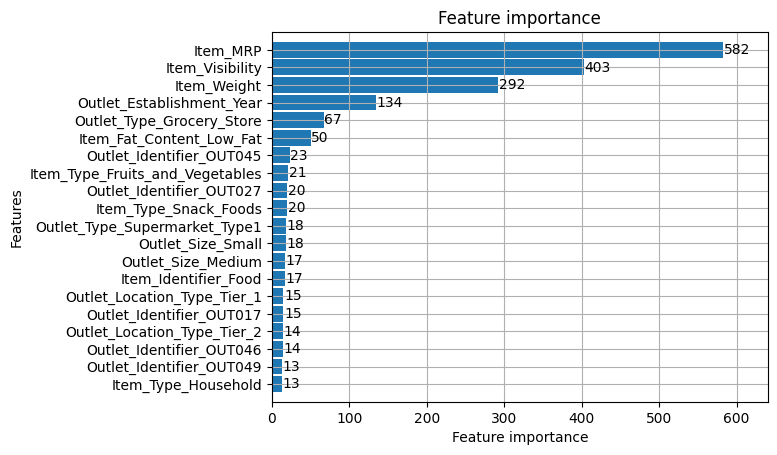

In [32]:
import lightgbm
lightgbm.plot_importance(model, max_num_features = 20, height=.9)

In [33]:
#X_train.columns
#'Outlet_Type_Grocery_Store', 'Item_Fat_Content_Low_Fat'
#Outlet_Type_Grocery Store

SyntaxError: invalid syntax (2452987021.py, line 3)

In [34]:
train_x_if = X_train[['Item_MRP','Item_Visibility','Item_Weight','Outlet_Establishment_Year',
                     'Outlet_Type_Grocery Store','Item_Fat_Content_Low Fat','Outlet_Identifier_OUT027']]
test_x_if=  X_test[['Item_MRP','Item_Visibility','Item_Weight','Outlet_Establishment_Year',
                     'Outlet_Type_Grocery Store','Item_Fat_Content_Low Fat','Outlet_Identifier_OUT027']]

model_if=LGR(num_leaves=20,objective='regression',boosting_type='gbdt',learning_rate=0.1,max_dept=5,reg_alpha=0,min_child_samples=10)
model_if.fit(train_x_if,Y_train,eval_metric='rmse')

predict_train_with_if = model_if.predict(train_x_if)
predict_test_with_if = model_if.predict(test_x_if)


print('R2 on train data: ', r(Y_train, predict_train_with_if)**(0.5))
print('R2 on test data: ',  r(Y_test, predict_test_with_if)**(0.5))
#Y_train.shape,train_x_if.shape,predict_train_with_if

[LightGBM] [Warning] Unknown parameter: max_dept
R2 on train data:  0.8376457841389847
R2 on test data:  0.7628717076402155


In [35]:
Test_file_if = Test_File[['Item_MRP','Item_Visibility','Item_Weight','Outlet_Establishment_Year',
                     'Outlet_Type_Grocery Store','Item_Fat_Content_Low Fat','Outlet_Identifier_OUT027']]

model_if=LGR(num_leaves=20,objective='regression',boosting_type='gbdt',learning_rate=0.1,max_dept=5,reg_alpha=0,min_child_samples=10)
model_if.fit(train_x_if,Y_train)
predict=model_if.predict(Test_file_if)

[LightGBM] [Warning] Unknown parameter: max_dept


In [36]:
Predict_if = pd.DataFrame()
Predict_if['Item_Identifier'] = df_testo['Item_Identifier']
Predict_if['Outlet_Identifier'] = df_testo['Outlet_Identifier']
Predict_if['Item_Outlet_Sales']= predict

In [37]:
Predict_if.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1577.685570
1,FDW14,OUT017,1362.104143
2,NCN55,OUT010,757.293317
3,FDQ58,OUT017,2515.523370
4,FDY38,OUT027,6073.234026


In [38]:
predict.to_csv(r'C:\Users\admin\Desktop\Analytics vidhya\1) Machine Learning\Data Hacks Practice\2) Big Mart Sales Predict\submission_predictions_2_using_LXGB.csv', index=False,header=True)

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

### Saving Model

In [40]:
# saving the model
import pickle 
filename="savemodel.sav"
pickle.dump(model,open(filename,'wb'))


In [41]:
load_model= pickle.load(open(filename,'rb'))

In [42]:
Test_File[['Item_MRP','Item_Visibility','Item_Weight','Outlet_Establishment_Year',
                     'Outlet_Type_Grocery Store','Item_Fat_Content_Low Fat','Outlet_Identifier_OUT027']]

,Item_MRP,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Type_Grocery Store,Item_Fat_Content_Low Fat,Outlet_Identifier_OUT027
0,107.8622,0.007565,20.750,1999,0,1,0
1,87.3198,0.038428,8.300,2007,0,0,0
2,241.7538,0.099575,14.600,1998,1,1,0
3,155.0340,0.015388,7.315,2007,0,1,0
4,234.2300,0.118599,12.500,1985,0,0,1
...,...,...,...,...,...,...,...
5676,141.3154,0.013496,10.500,1997,0,0,0
5677,169.1448,0.142991,7.600,2009,0,0,0
5678,118.7440,0.073529,10.000,2002,0,1,0
5679,214.6218,0.000000,15.300,2007,0,0,0
